# **SUPERMARKET CAMPAIGN**

# **1. IMPORTING LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import warnings

warnings.filterwarnings('ignore')

In [3]:
#pd.set_option('display.max_rows', 100)
pd.reset_option('display.max_rows')

pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns')

pd.set_option('display.max_colwidth', 500)

# **2. Loading Data**

In [4]:
# Load Data

data = pd.read_excel('Supermarket Customers.xlsx')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


# **3. DATA PREPROCESSING**

### **Info Data**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### **Cek % Missing Value**

In [6]:
data.isnull().sum() / len(data) * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

- Terdapat missing value pada kolom income sebesar 1.071429 %
- Karena missing value dibawah 10% maka saya akan menghapus missing value tersebut

In [7]:
# Menghapus Missing Value

data = data.dropna()

### **Cek data duplikat**

In [8]:
data.drop_duplicates(inplace=True)

### **Cek Umur Customer**

In [9]:
data.insert(2, 'Age', 2024 - data['Year_Birth'])
data

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,43,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,78,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,43,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,68,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


#### **Grouping Age**

In [10]:
age_group = [(23,30),(31,40),(41,50),(51,60),(61,70),(71,85)]

def assign_age_group (Age) :
    for age_range in age_group :
        if age_range[0] <= Age <= age_range[1]:
            return f'{age_range[0]} - {age_range[1]}'
    return('Unknown')

data.insert(3, 'Age_Group', data['Age'].apply(assign_age_group))
data

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,61 - 70,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,61 - 70,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,51 - 60,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,31 - 40,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,43,41 - 50,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,51 - 60,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,78,71 - 85,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,43,41 - 50,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,68,61 - 70,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [11]:
g = (data['Age_Group'] == 'Unknown').sum()
g

np.int64(3)

### **Cek Marital_Status**

In [12]:
# Cek unik education dan marital status

print('Total kategori pada kolom Education:\n', data['Education'].value_counts(), '\n')
print('Total kategori pada kolom Marital_Status:\n', data['Marital_Status'].value_counts())

Total kategori pada kolom Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64 

Total kategori pada kolom Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [13]:
Living_With = data['Marital_Status'].replace({'Married' : 'Partner',
                                                      'Together' : 'Partner',
                                                      'Absurd' : 'Alone',
                                                      'Widow' : 'Alone',
                                                      'YOLO' : 'Alone',
                                                      'Divorced' : 'Alone',
                                                      'Single' : 'Alone',
                                                      })

In [14]:
data.insert(5, 'Living_With', Living_With)
data

,ID,Year_Birth,Age,Age_Group,Education,Living_With,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,61 - 70,Graduation,Alone,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,61 - 70,Graduation,Alone,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,51 - 60,Graduation,Partner,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,31 - 40,Graduation,Partner,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,43,41 - 50,PhD,Partner,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,51 - 60,Graduation,Partner,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,78,71 - 85,PhD,Partner,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,43,41 - 50,Graduation,Alone,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,68,61 - 70,Master,Partner,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### **Children**

In [15]:
children  = data['Kidhome'] + data['Teenhome']

data.insert(10, 'Children', children)

data

,ID,Year_Birth,Age,Age_Group,Education,Living_With,Marital_Status,Income,Kidhome,Teenhome,Children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,61 - 70,Graduation,Alone,Single,58138.0,0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,61 - 70,Graduation,Alone,Single,46344.0,1,1,2,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,51 - 60,Graduation,Partner,Together,71613.0,0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,31 - 40,Graduation,Partner,Together,26646.0,1,0,1,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,43,41 - 50,PhD,Partner,Married,58293.0,1,0,1,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,51 - 60,Graduation,Partner,Married,61223.0,0,1,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,78,71 - 85,PhD,Partner,Together,64014.0,2,1,3,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,43,41 - 50,Graduation,Alone,Divorced,56981.0,0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,68,61 - 70,Master,Partner,Together,69245.0,0,1,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### **IS Family**

In [16]:
data.insert(11, 'Is_Family', np.where((data['Kidhome'] + data['Teenhome']) == 0, 'Not Family', 'Family'))

data

,ID,Year_Birth,Age,Age_Group,Education,Living_With,Marital_Status,Income,Kidhome,Teenhome,Children,Is_Family,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,61 - 70,Graduation,Alone,Single,58138.0,0,0,0,Not Family,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,61 - 70,Graduation,Alone,Single,46344.0,1,1,2,Family,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,51 - 60,Graduation,Partner,Together,71613.0,0,0,0,Not Family,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,31 - 40,Graduation,Partner,Together,26646.0,1,0,1,Family,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,43,41 - 50,PhD,Partner,Married,58293.0,1,0,1,Family,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,51 - 60,Graduation,Partner,Married,61223.0,0,1,1,Family,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,78,71 - 85,PhD,Partner,Together,64014.0,2,1,3,Family,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,43,41 - 50,Graduation,Alone,Divorced,56981.0,0,0,0,Not Family,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,68,61 - 70,Master,Partner,Together,69245.0,0,1,1,Family,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### **Total Spent**

In [17]:
data.insert(21, 'Total_Spent', data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis = 1))
data

,ID,Year_Birth,Age,Age_Group,Education,Living_With,Marital_Status,Income,Kidhome,Teenhome,Children,Is_Family,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,Total_Spent,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,61 - 70,Graduation,Alone,Single,58138.0,0,0,0,Not Family,2012-09-04,58,635,88,546,172,88,88,3,1617,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,61 - 70,Graduation,Alone,Single,46344.0,1,1,2,Family,2014-03-08,38,11,1,6,2,1,6,2,27,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,51 - 60,Graduation,Partner,Together,71613.0,0,0,0,Not Family,2013-08-21,26,426,49,127,111,21,42,1,776,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,31 - 40,Graduation,Partner,Together,26646.0,1,0,1,Family,2014-02-10,26,11,4,20,10,3,5,2,53,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,43,41 - 50,PhD,Partner,Married,58293.0,1,0,1,Family,2014-01-19,94,173,43,118,46,27,15,5,422,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,51 - 60,Graduation,Partner,Married,61223.0,0,1,1,Family,2013-06-13,46,709,43,182,42,118,247,2,1341,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,78,71 - 85,PhD,Partner,Together,64014.0,2,1,3,Family,2014-06-10,56,406,0,30,0,0,8,7,444,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,43,41 - 50,Graduation,Alone,Divorced,56981.0,0,0,0,Not Family,2014-01-25,91,908,48,217,32,12,24,1,1241,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,68,61 - 70,Master,Partner,Together,69245.0,0,1,1,Family,2014-01-24,8,428,30,214,80,30,61,2,843,6,5,10,3,0,0,0,0,0,0,3,11,0


### **Total Partisipasi**

In [18]:
data.insert(33, 'Total_Participation', data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis = 1))
data

,ID,Year_Birth,Age,Age_Group,Education,Living_With,Marital_Status,Income,Kidhome,Teenhome,Children,Is_Family,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,Total_Spent,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Total_Participation,Z_Revenue,Response
0,5524,1957,67,61 - 70,Graduation,Alone,Single,58138.0,0,0,0,Not Family,2012-09-04,58,635,88,546,172,88,88,3,1617,8,10,4,7,0,0,0,0,0,0,3,1,11,1
1,2174,1954,70,61 - 70,Graduation,Alone,Single,46344.0,1,1,2,Family,2014-03-08,38,11,1,6,2,1,6,2,27,1,1,2,5,0,0,0,0,0,0,3,0,11,0
2,4141,1965,59,51 - 60,Graduation,Partner,Together,71613.0,0,0,0,Not Family,2013-08-21,26,426,49,127,111,21,42,1,776,8,2,10,4,0,0,0,0,0,0,3,0,11,0
3,6182,1984,40,31 - 40,Graduation,Partner,Together,26646.0,1,0,1,Family,2014-02-10,26,11,4,20,10,3,5,2,53,2,0,4,6,0,0,0,0,0,0,3,0,11,0
4,5324,1981,43,41 - 50,PhD,Partner,Married,58293.0,1,0,1,Family,2014-01-19,94,173,43,118,46,27,15,5,422,5,3,6,5,0,0,0,0,0,0,3,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,51 - 60,Graduation,Partner,Married,61223.0,0,1,1,Family,2013-06-13,46,709,43,182,42,118,247,2,1341,9,3,4,5,0,0,0,0,0,0,3,0,11,0
2236,4001,1946,78,71 - 85,PhD,Partner,Together,64014.0,2,1,3,Family,2014-06-10,56,406,0,30,0,0,8,7,444,8,2,5,7,0,0,0,1,0,0,3,1,11,0
2237,7270,1981,43,41 - 50,Graduation,Alone,Divorced,56981.0,0,0,0,Not Family,2014-01-25,91,908,48,217,32,12,24,1,1241,2,3,13,6,0,1,0,0,0,0,3,1,11,0
2238,8235,1956,68,61 - 70,Master,Partner,Together,69245.0,0,1,1,Family,2014-01-24,8,428,30,214,80,30,61,2,843,6,5,10,3,0,0,0,0,0,0,3,0,11,0


### **Total Lokasi Belanja**

In [19]:
data.insert(26, 'Total_Place', data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis = 1))
data

,ID,Year_Birth,Age,Age_Group,Education,Living_With,Marital_Status,Income,Kidhome,Teenhome,Children,Is_Family,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,Total_Spent,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Place,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Total_Participation,Z_Revenue,Response
0,5524,1957,67,61 - 70,Graduation,Alone,Single,58138.0,0,0,0,Not Family,2012-09-04,58,635,88,546,172,88,88,3,1617,8,10,4,7,22,0,0,0,0,0,0,3,1,11,1
1,2174,1954,70,61 - 70,Graduation,Alone,Single,46344.0,1,1,2,Family,2014-03-08,38,11,1,6,2,1,6,2,27,1,1,2,5,4,0,0,0,0,0,0,3,0,11,0
2,4141,1965,59,51 - 60,Graduation,Partner,Together,71613.0,0,0,0,Not Family,2013-08-21,26,426,49,127,111,21,42,1,776,8,2,10,4,20,0,0,0,0,0,0,3,0,11,0
3,6182,1984,40,31 - 40,Graduation,Partner,Together,26646.0,1,0,1,Family,2014-02-10,26,11,4,20,10,3,5,2,53,2,0,4,6,6,0,0,0,0,0,0,3,0,11,0
4,5324,1981,43,41 - 50,PhD,Partner,Married,58293.0,1,0,1,Family,2014-01-19,94,173,43,118,46,27,15,5,422,5,3,6,5,14,0,0,0,0,0,0,3,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,51 - 60,Graduation,Partner,Married,61223.0,0,1,1,Family,2013-06-13,46,709,43,182,42,118,247,2,1341,9,3,4,5,16,0,0,0,0,0,0,3,0,11,0
2236,4001,1946,78,71 - 85,PhD,Partner,Together,64014.0,2,1,3,Family,2014-06-10,56,406,0,30,0,0,8,7,444,8,2,5,7,15,0,0,0,1,0,0,3,1,11,0
2237,7270,1981,43,41 - 50,Graduation,Alone,Divorced,56981.0,0,0,0,Not Family,2014-01-25,91,908,48,217,32,12,24,1,1241,2,3,13,6,18,0,1,0,0,0,0,3,1,11,0
2238,8235,1956,68,61 - 70,Master,Partner,Together,69245.0,0,1,1,Family,2014-01-24,8,428,30,214,80,30,61,2,843,6,5,10,3,21,0,0,0,0,0,0,3,0,11,0


### **Hapus Kolom**

In [20]:
to_drop = ['Z_CostContact', 'Z_Revenue']
data = data.drop(to_drop, axis = 1)
data

,ID,Year_Birth,Age,Age_Group,Education,Living_With,Marital_Status,Income,Kidhome,Teenhome,Children,Is_Family,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,Total_Spent,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Place,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Total_Participation,Response
0,5524,1957,67,61 - 70,Graduation,Alone,Single,58138.0,0,0,0,Not Family,2012-09-04,58,635,88,546,172,88,88,3,1617,8,10,4,7,22,0,0,0,0,0,0,1,1
1,2174,1954,70,61 - 70,Graduation,Alone,Single,46344.0,1,1,2,Family,2014-03-08,38,11,1,6,2,1,6,2,27,1,1,2,5,4,0,0,0,0,0,0,0,0
2,4141,1965,59,51 - 60,Graduation,Partner,Together,71613.0,0,0,0,Not Family,2013-08-21,26,426,49,127,111,21,42,1,776,8,2,10,4,20,0,0,0,0,0,0,0,0
3,6182,1984,40,31 - 40,Graduation,Partner,Together,26646.0,1,0,1,Family,2014-02-10,26,11,4,20,10,3,5,2,53,2,0,4,6,6,0,0,0,0,0,0,0,0
4,5324,1981,43,41 - 50,PhD,Partner,Married,58293.0,1,0,1,Family,2014-01-19,94,173,43,118,46,27,15,5,422,5,3,6,5,14,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,51 - 60,Graduation,Partner,Married,61223.0,0,1,1,Family,2013-06-13,46,709,43,182,42,118,247,2,1341,9,3,4,5,16,0,0,0,0,0,0,0,0
2236,4001,1946,78,71 - 85,PhD,Partner,Together,64014.0,2,1,3,Family,2014-06-10,56,406,0,30,0,0,8,7,444,8,2,5,7,15,0,0,0,1,0,0,1,0
2237,7270,1981,43,41 - 50,Graduation,Alone,Divorced,56981.0,0,0,0,Not Family,2014-01-25,91,908,48,217,32,12,24,1,1241,2,3,13,6,18,0,1,0,0,0,0,1,0
2238,8235,1956,68,61 - 70,Master,Partner,Together,69245.0,0,1,1,Family,2014-01-24,8,428,30,214,80,30,61,2,843,6,5,10,3,21,0,0,0,0,0,0,0,0


### **Mengubah Nama Kolom**

In [21]:
data = data.rename(columns = {'MntWines' : 'Wines',
                              'MntFruits' : 'Fruits',
                              'MntMeatProducts' : 'Meat',
                              'MntFishProducts' : 'Fish',
                              'MntSweetProducts' : 'Sweet',
                              'MntGoldProds' : 'Gold',
                              'NumDealsPurchases' : 'Discount',
                              'NumWebPurchases' : 'From_Website',
                              'NumCatalogPurchases' : 'From_Catalog',
                              'NumStorePurchases' : 'From_Store',
                              'NumWebVisitsMonth' : 'Web_Visit/Month',
                              'AcceptedCmp3' : 'Campaign_3',
                              'AcceptedCmp4' : 'Campaign_4',
                              'AcceptedCmp5' : 'Campaign_5',
                              'AcceptedCmp1' : 'Campaign_1',
                              'AcceptedCmp2' : 'Campaign_2',
                              'Response' : 'Last_Campaign',
                              })
data

,ID,Year_Birth,Age,Age_Group,Education,Living_With,Marital_Status,Income,Kidhome,Teenhome,Children,Is_Family,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount,Total_Spent,From_Website,From_Catalog,From_Store,Web_Visit/Month,Total_Place,Campaign_3,Campaign_4,Campaign_5,Campaign_1,Campaign_2,Complain,Total_Participation,Last_Campaign
0,5524,1957,67,61 - 70,Graduation,Alone,Single,58138.0,0,0,0,Not Family,2012-09-04,58,635,88,546,172,88,88,3,1617,8,10,4,7,22,0,0,0,0,0,0,1,1
1,2174,1954,70,61 - 70,Graduation,Alone,Single,46344.0,1,1,2,Family,2014-03-08,38,11,1,6,2,1,6,2,27,1,1,2,5,4,0,0,0,0,0,0,0,0
2,4141,1965,59,51 - 60,Graduation,Partner,Together,71613.0,0,0,0,Not Family,2013-08-21,26,426,49,127,111,21,42,1,776,8,2,10,4,20,0,0,0,0,0,0,0,0
3,6182,1984,40,31 - 40,Graduation,Partner,Together,26646.0,1,0,1,Family,2014-02-10,26,11,4,20,10,3,5,2,53,2,0,4,6,6,0,0,0,0,0,0,0,0
4,5324,1981,43,41 - 50,PhD,Partner,Married,58293.0,1,0,1,Family,2014-01-19,94,173,43,118,46,27,15,5,422,5,3,6,5,14,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,51 - 60,Graduation,Partner,Married,61223.0,0,1,1,Family,2013-06-13,46,709,43,182,42,118,247,2,1341,9,3,4,5,16,0,0,0,0,0,0,0,0
2236,4001,1946,78,71 - 85,PhD,Partner,Together,64014.0,2,1,3,Family,2014-06-10,56,406,0,30,0,0,8,7,444,8,2,5,7,15,0,0,0,1,0,0,1,0
2237,7270,1981,43,41 - 50,Graduation,Alone,Divorced,56981.0,0,0,0,Not Family,2014-01-25,91,908,48,217,32,12,24,1,1241,2,3,13,6,18,0,1,0,0,0,0,1,0
2238,8235,1956,68,61 - 70,Master,Partner,Together,69245.0,0,1,1,Family,2014-01-24,8,428,30,214,80,30,61,2,843,6,5,10,3,21,0,0,0,0,0,0,0,0


### **Merapikan Index Kolom**

In [22]:
data = data.iloc[:, [0,1,2,3,4,5,6,8,9,10,11,7,12,13,14,15,16,17,18,19,21,20,22,23,24,26,25,30,31,27,28,29,34,33,32]]
data

,ID,Year_Birth,Age,Age_Group,Education,Living_With,Marital_Status,Kidhome,Teenhome,Children,Is_Family,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spent,Discount,From_Website,From_Catalog,From_Store,Total_Place,Web_Visit/Month,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5,Last_Campaign,Total_Participation,Complain
0,5524,1957,67,61 - 70,Graduation,Alone,Single,0,0,0,Not Family,58138.0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,1,1,0
1,2174,1954,70,61 - 70,Graduation,Alone,Single,1,1,2,Family,46344.0,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0,0
2,4141,1965,59,51 - 60,Graduation,Partner,Together,0,0,0,Not Family,71613.0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0,0
3,6182,1984,40,31 - 40,Graduation,Partner,Together,1,0,1,Family,26646.0,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0,0
4,5324,1981,43,41 - 50,PhD,Partner,Married,1,0,1,Family,58293.0,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,51 - 60,Graduation,Partner,Married,0,1,1,Family,61223.0,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0,0
2236,4001,1946,78,71 - 85,PhD,Partner,Together,2,1,3,Family,64014.0,2014-06-10,56,406,0,30,0,0,8,444,7,8,2,5,15,7,1,0,0,0,0,0,1,0
2237,7270,1981,43,41 - 50,Graduation,Alone,Divorced,0,0,0,Not Family,56981.0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,0,0,1,0,0,1,0
2238,8235,1956,68,61 - 70,Master,Partner,Together,0,1,1,Family,69245.0,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0,0


### **Cek Outliers**

#### **Age**

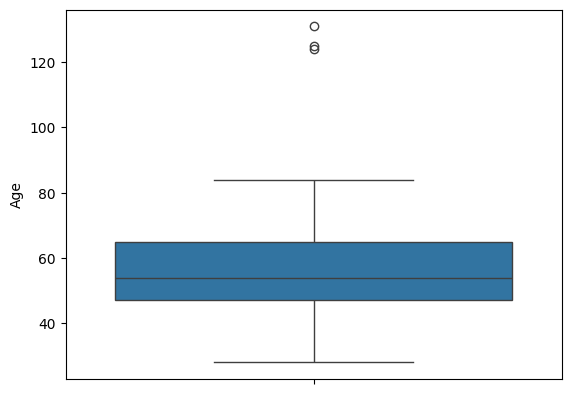

In [23]:
sns.boxplot(data['Age'])
plt.show()

##### **Menampilkan Data Ekstrim**

In [24]:
d = data[data['Age'] > 100]
d

,ID,Year_Birth,Age,Age_Group,Education,Living_With,Marital_Status,Kidhome,Teenhome,Children,Is_Family,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spent,Discount,From_Website,From_Catalog,From_Store,Total_Place,Web_Visit/Month,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5,Last_Campaign,Total_Participation,Complain
192,7829,1900,124,Unknown,2n Cycle,Alone,Divorced,1,0,1,Family,36640.0,2013-09-26,99,15,6,8,7,4,25,65,1,2,1,2,5,5,0,0,0,0,0,0,0,1
239,11004,1893,131,Unknown,2n Cycle,Alone,Single,0,1,1,Family,60182.0,2014-05-17,23,8,0,5,7,0,2,22,1,1,0,2,3,4,0,0,0,0,0,0,0,0
339,1150,1899,125,Unknown,PhD,Partner,Together,0,0,0,Not Family,83532.0,2013-09-26,36,755,144,562,104,64,224,1853,1,4,6,4,14,1,0,0,0,0,1,0,1,0


##### **Mengambil Data Dengan Umur Dibawah 100**

In [25]:
data = data[data['Age'] < 100]
data

,ID,Year_Birth,Age,Age_Group,Education,Living_With,Marital_Status,Kidhome,Teenhome,Children,Is_Family,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spent,Discount,From_Website,From_Catalog,From_Store,Total_Place,Web_Visit/Month,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5,Last_Campaign,Total_Participation,Complain
0,5524,1957,67,61 - 70,Graduation,Alone,Single,0,0,0,Not Family,58138.0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,1,1,0
1,2174,1954,70,61 - 70,Graduation,Alone,Single,1,1,2,Family,46344.0,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0,0
2,4141,1965,59,51 - 60,Graduation,Partner,Together,0,0,0,Not Family,71613.0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0,0
3,6182,1984,40,31 - 40,Graduation,Partner,Together,1,0,1,Family,26646.0,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0,0
4,5324,1981,43,41 - 50,PhD,Partner,Married,1,0,1,Family,58293.0,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,51 - 60,Graduation,Partner,Married,0,1,1,Family,61223.0,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0,0
2236,4001,1946,78,71 - 85,PhD,Partner,Together,2,1,3,Family,64014.0,2014-06-10,56,406,0,30,0,0,8,444,7,8,2,5,15,7,1,0,0,0,0,0,1,0
2237,7270,1981,43,41 - 50,Graduation,Alone,Divorced,0,0,0,Not Family,56981.0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,0,0,1,0,0,1,0
2238,8235,1956,68,61 - 70,Master,Partner,Together,0,1,1,Family,69245.0,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0,0


#### **Income**

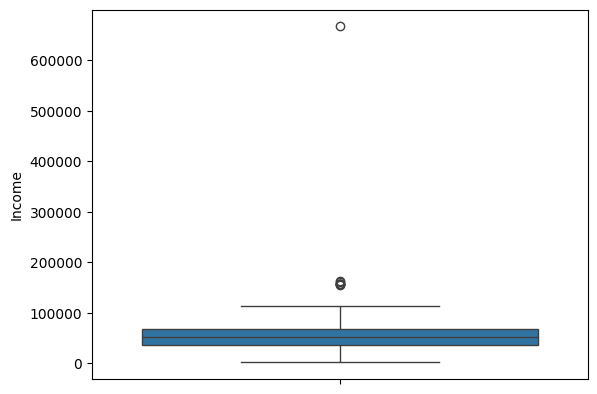

In [26]:
sns.boxplot(data['Income'])
plt.show()

##### **Menampilkan Data Ekstrim**

In [27]:
i = data[data['Income'] > 200000]
i

,ID,Year_Birth,Age,Age_Group,Education,Living_With,Marital_Status,Kidhome,Teenhome,Children,Is_Family,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spent,Discount,From_Website,From_Catalog,From_Store,Total_Place,Web_Visit/Month,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5,Last_Campaign,Total_Participation,Complain
2233,9432,1977,47,41 - 50,Graduation,Partner,Together,1,0,1,Family,666666.0,2013-06-02,23,9,14,18,8,1,12,62,4,3,1,3,7,6,0,0,0,0,0,0,0,0


##### **Mengambil Data Income Dibawah 200.000**

In [28]:
data = data[data['Income'] < 200000]
data

,ID,Year_Birth,Age,Age_Group,Education,Living_With,Marital_Status,Kidhome,Teenhome,Children,Is_Family,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spent,Discount,From_Website,From_Catalog,From_Store,Total_Place,Web_Visit/Month,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5,Last_Campaign,Total_Participation,Complain
0,5524,1957,67,61 - 70,Graduation,Alone,Single,0,0,0,Not Family,58138.0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,1,1,0
1,2174,1954,70,61 - 70,Graduation,Alone,Single,1,1,2,Family,46344.0,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0,0
2,4141,1965,59,51 - 60,Graduation,Partner,Together,0,0,0,Not Family,71613.0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0,0
3,6182,1984,40,31 - 40,Graduation,Partner,Together,1,0,1,Family,26646.0,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0,0
4,5324,1981,43,41 - 50,PhD,Partner,Married,1,0,1,Family,58293.0,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,51 - 60,Graduation,Partner,Married,0,1,1,Family,61223.0,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0,0
2236,4001,1946,78,71 - 85,PhD,Partner,Together,2,1,3,Family,64014.0,2014-06-10,56,406,0,30,0,0,8,444,7,8,2,5,15,7,1,0,0,0,0,0,1,0
2237,7270,1981,43,41 - 50,Graduation,Alone,Divorced,0,0,0,Not Family,56981.0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,0,0,1,0,0,1,0
2238,8235,1956,68,61 - 70,Master,Partner,Together,0,1,1,Family,69245.0,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0,0


# **4. EXPLORATORY DATA ANALYSIS**

## **A. INFORMATION DATA**

In [29]:
data

,ID,Year_Birth,Age,Age_Group,Education,Living_With,Marital_Status,Kidhome,Teenhome,Children,Is_Family,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spent,Discount,From_Website,From_Catalog,From_Store,Total_Place,Web_Visit/Month,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5,Last_Campaign,Total_Participation,Complain
0,5524,1957,67,61 - 70,Graduation,Alone,Single,0,0,0,Not Family,58138.0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,1,1,0
1,2174,1954,70,61 - 70,Graduation,Alone,Single,1,1,2,Family,46344.0,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0,0
2,4141,1965,59,51 - 60,Graduation,Partner,Together,0,0,0,Not Family,71613.0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0,0
3,6182,1984,40,31 - 40,Graduation,Partner,Together,1,0,1,Family,26646.0,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0,0
4,5324,1981,43,41 - 50,PhD,Partner,Married,1,0,1,Family,58293.0,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,51 - 60,Graduation,Partner,Married,0,1,1,Family,61223.0,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0,0
2236,4001,1946,78,71 - 85,PhD,Partner,Together,2,1,3,Family,64014.0,2014-06-10,56,406,0,30,0,0,8,444,7,8,2,5,15,7,1,0,0,0,0,0,1,0
2237,7270,1981,43,41 - 50,Graduation,Alone,Divorced,0,0,0,Not Family,56981.0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,0,0,1,0,0,1,0
2238,8235,1956,68,61 - 70,Master,Partner,Together,0,1,1,Family,69245.0,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0,0


In [30]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   int64         
 1   Year_Birth           2212 non-null   int64         
 2   Age                  2212 non-null   int64         
 3   Age_Group            2212 non-null   object        
 4   Education            2212 non-null   object        
 5   Living_With          2212 non-null   object        
 6   Marital_Status       2212 non-null   object        
 7   Kidhome              2212 non-null   int64         
 8   Teenhome             2212 non-null   int64         
 9   Children             2212 non-null   int64         
 10  Is_Family            2212 non-null   object        
 11  Income               2212 non-null   float64       
 12  Dt_Customer          2212 non-null   datetime64[ns]
 13  Recency              2212 non-null   i

In [31]:
# Descriptive Data
data.describe()

,ID,Year_Birth,Age,Kidhome,Teenhome,Children,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spent,Discount,From_Website,From_Catalog,From_Store,Total_Place,Web_Visit/Month,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5,Last_Campaign,Total_Participation,Complain
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,5585.160940,1968.913653,55.086347,0.441682,0.505877,0.947559,51958.810579,2013-07-10 06:51:25.714285824,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,607.268083,2.324593,4.088156,2.672242,5.806510,12.566908,5.321429,0.064195,0.013562,0.073689,0.074141,0.072785,0.150542,0.448915,0.009042
min,0.000000,1940.000000,28.000000,0.000000,0.000000,0.000000,1730.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,47.000000,0.000000,0.000000,0.000000,35233.500000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,69.000000,1.000000,2.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5454.500000,1970.000000,54.000000,0.000000,0.000000,1.000000,51371.000000,2013-07-08 00:00:00,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,397.000000,2.000000,4.000000,2.000000,5.000000,12.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8418.500000,1977.000000,65.000000,1.000000,1.000000,1.000000,68487.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,1048.000000,3.000000,6.000000,4.000000,8.000000,18.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,11191.000000,1996.000000,84.000000,2.000000,2.000000,3.000000,162397.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,2525.000000,15.000000,27.000000,28.000000,13.000000,32.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000
std,3247.523735,11.701599,11.701599,0.536955,0.544253,0.749466,21527.278844,NaN,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,602.513364,1.924507,2.742187,2.927542,3.250939,7.205427,2.425597,0.245156,0.115691,0.261323,0.262060,0.259842,0.357683,0.893017,0.094678


## **B. CORRELATION MATRIX**

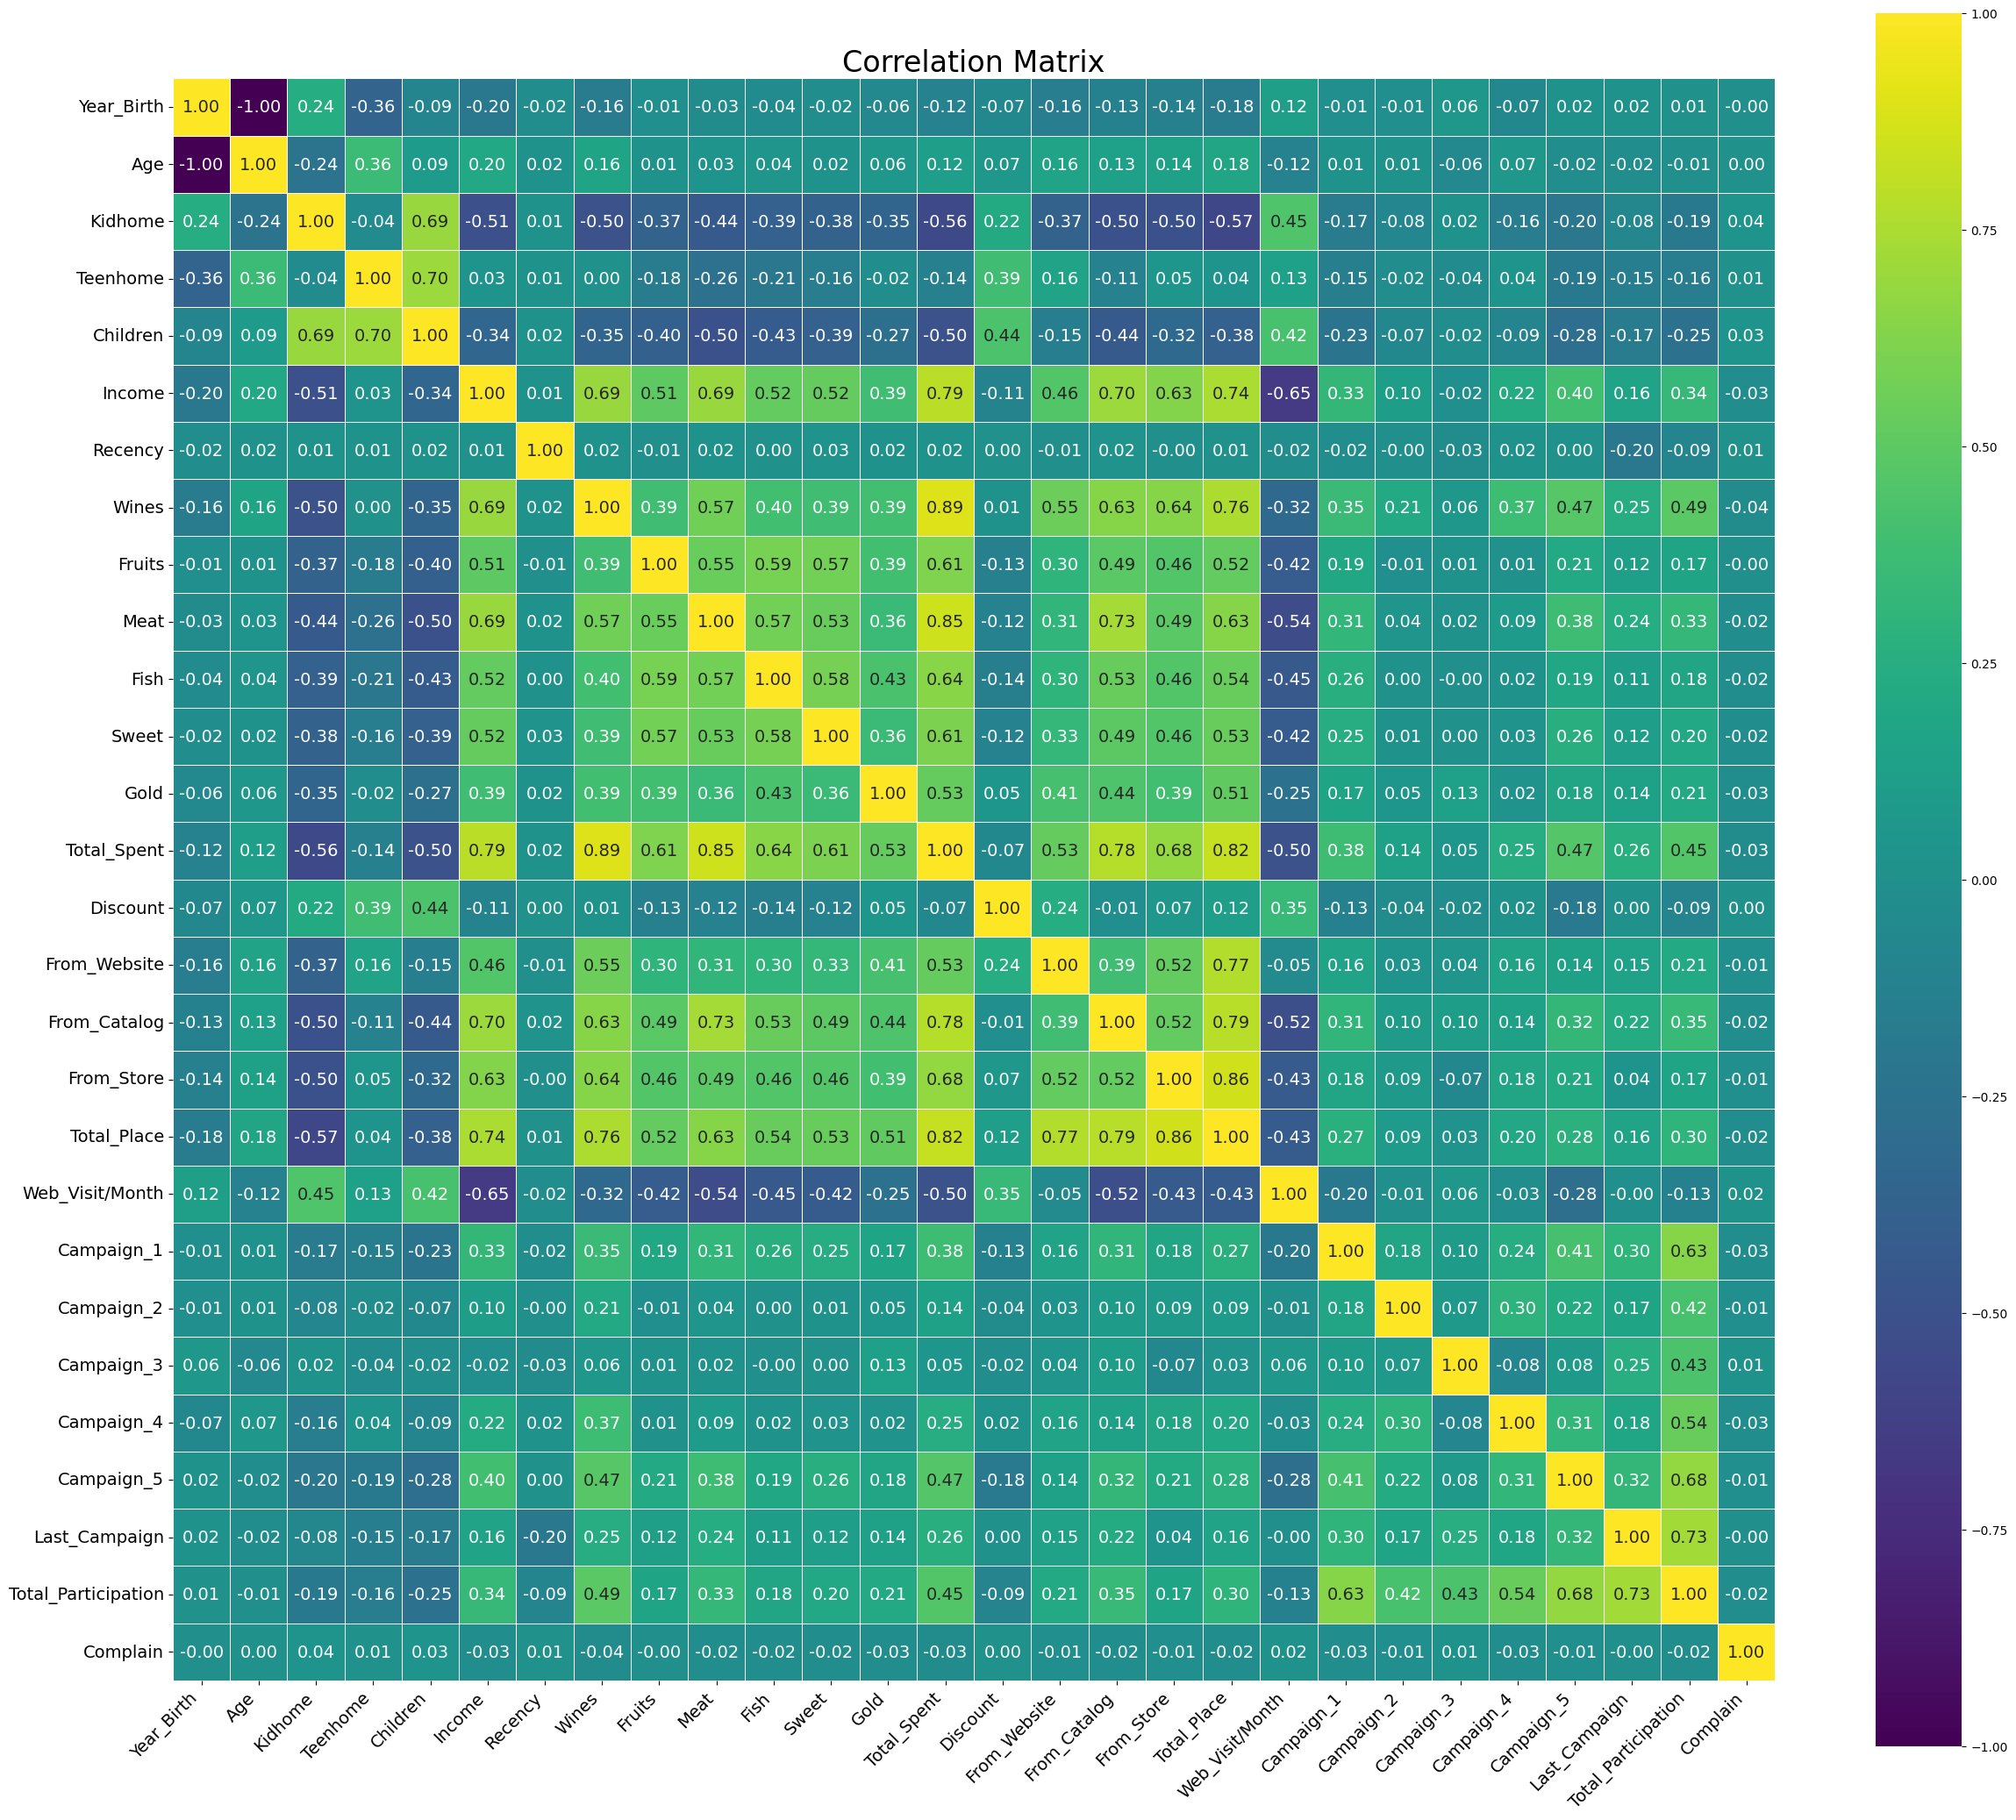

In [32]:
# Correlation matrix
corrmat = data.select_dtypes(include=['number']).drop(columns=['ID']).corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corrmat, annot=True, cmap="viridis", center=0, fmt=".2f", linewidths=0.5, square=True, annot_kws={"size": 14}, cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)
plt.title("Correlation Matrix", fontsize=24)
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

## **C. UNIVARIATE EXPLORATION**

### **1. AGE DISTRIBUTION OF CUSTOMER**

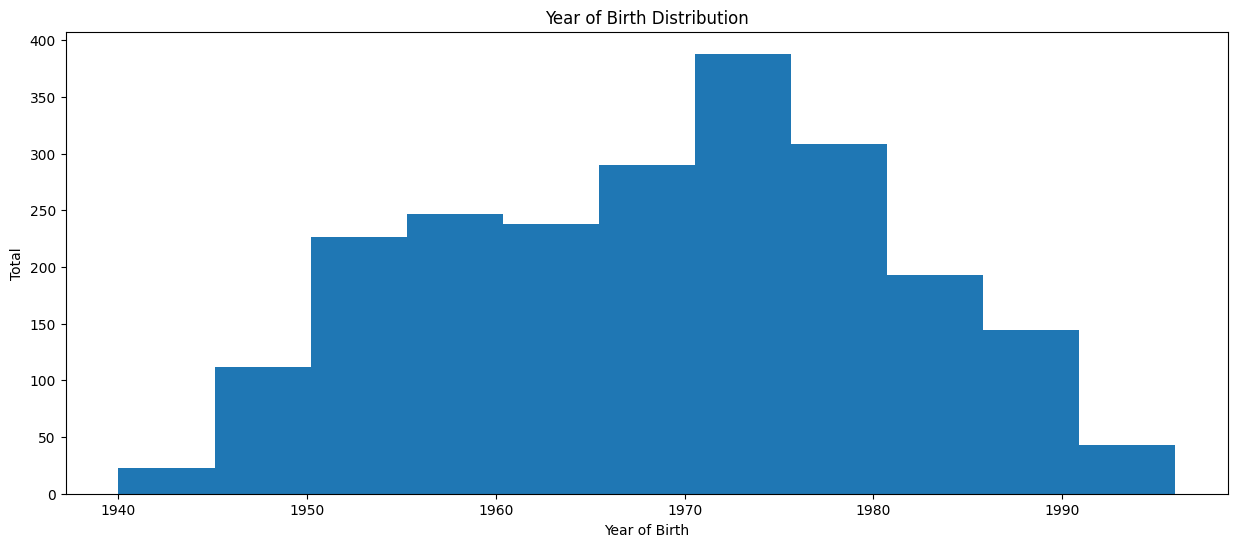

In [33]:
# From Year Birth
plt.figure(figsize=(15, 6))
data['Year_Birth'].plot(kind='hist', bins=11)
plt.title('Year of Birth Distribution')
plt.xlabel('Year of Birth')
plt.ylabel('Total')
plt.show()

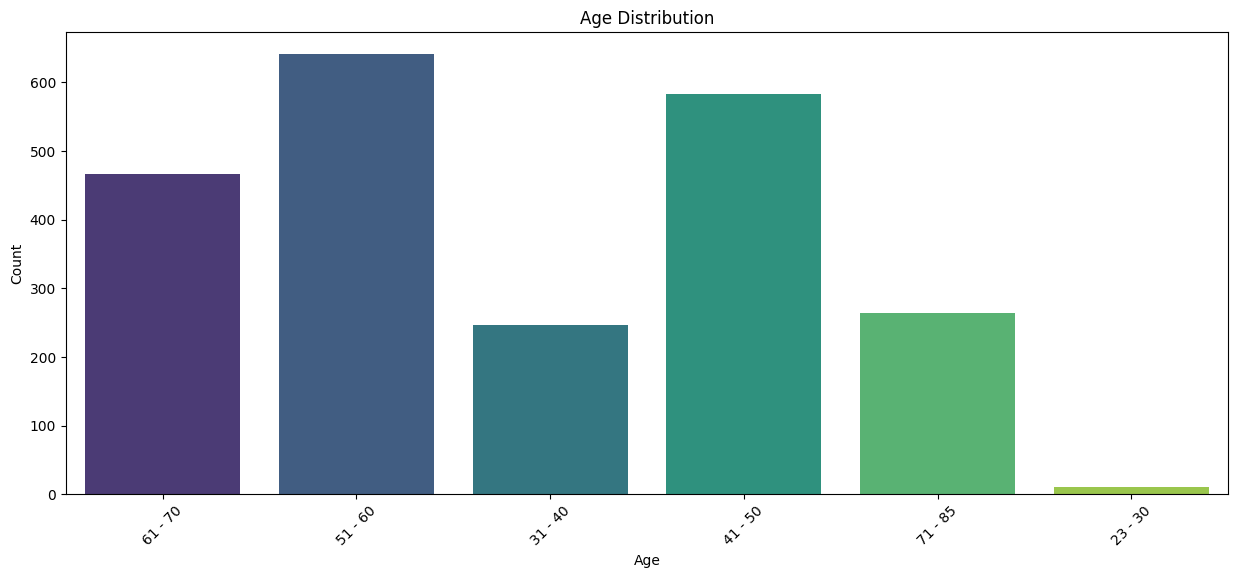

In [34]:
# From Age Group
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(data=data, x='Age_Group', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [35]:
age_group_counts = data['Age_Group'].value_counts()
age_group_percentage = (age_group_counts / len(data)) * 100
display(age_group_percentage)

Age_Group
51 - 60    28.978300
41 - 50    26.356239
61 - 70    21.112116
71 - 85    11.934901
31 - 40    11.166365
23 - 30     0.452080
Name: count, dtype: float64

### **2. EDUCATION LEVEL DISTRIBUTION**

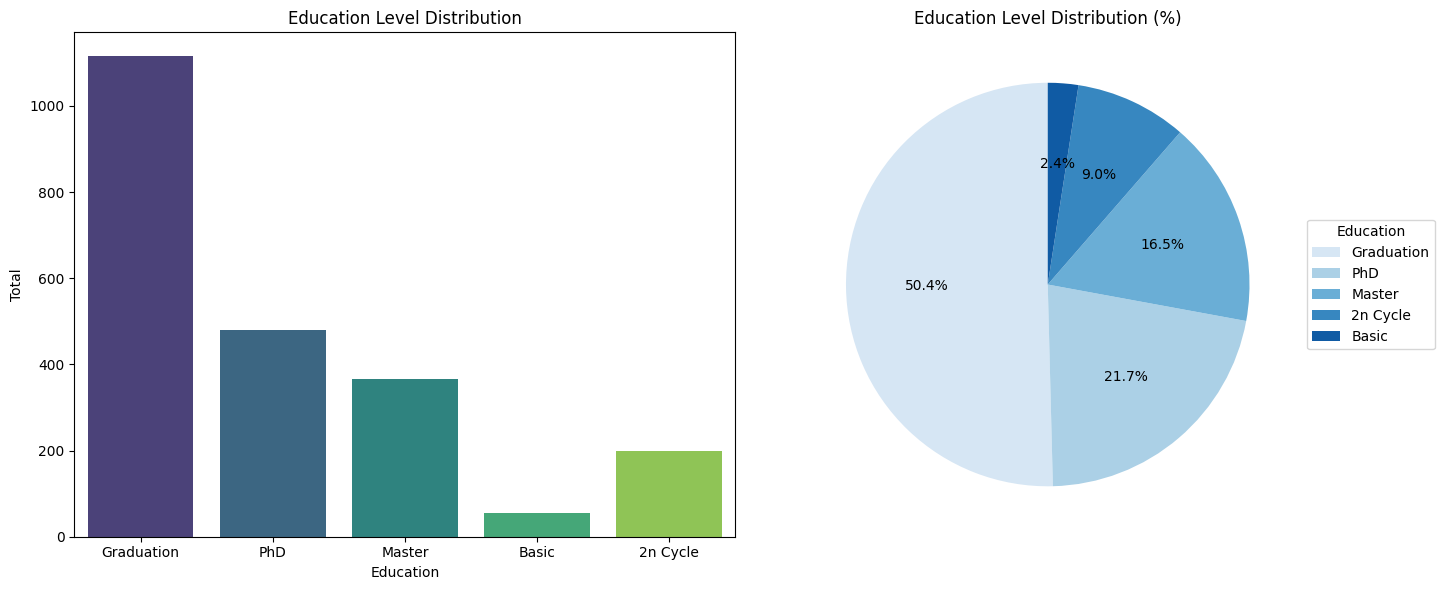

In [36]:
# Value counts and percentage
education_counts = data["Education"].value_counts()

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart 
sns.countplot(data=data, x="Education", ax=ax1, palette="viridis")
ax1.set_title("Education Level Distribution")
ax1.set_xlabel("Education")
ax1.set_ylabel("Total")
ax1.tick_params(axis="x", rotation=0)

# Pie Chart
wedges, texts, autotexts = ax2.pie(
    education_counts,
    autopct="%1.1f%%",  # Show percentage on the pie chart slices
    startangle=90,
    colors=sns.color_palette("Blues", len(education_counts))
)
ax2.set_title("Education Level Distribution (%)")

# Add legend outside the pie chart
ax2.legend(
    wedges,
    education_counts.index,
    title="Education",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Display plot
plt.tight_layout()
plt.show()

### **3. MARITAL STATUS DISTRIBUTION**

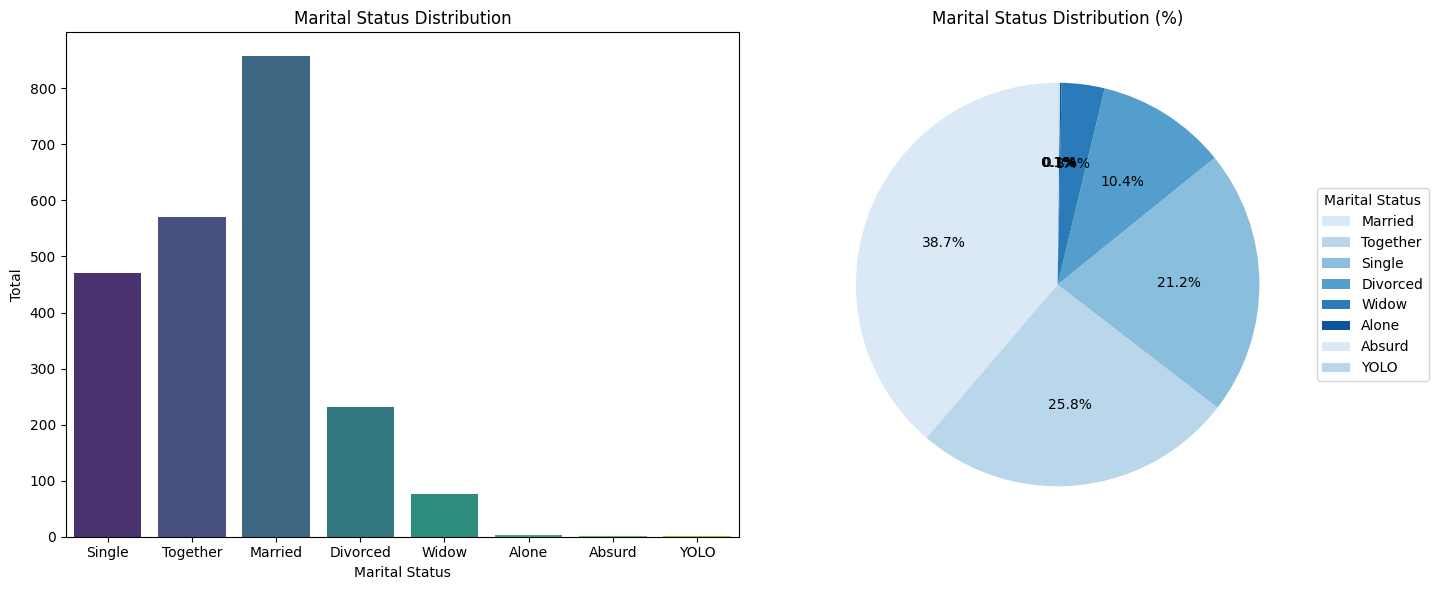

In [37]:
# Value counts and percentage
marital_counts = data["Marital_Status"].value_counts()

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart 
sns.countplot(data=data, x="Marital_Status", ax=ax1, palette="viridis")
ax1.set_title("Marital Status Distribution")
ax1.set_xlabel("Marital Status")
ax1.set_ylabel("Total")
ax1.tick_params(axis="x", rotation=0)

# Pie Chart
wedges, texts, autotexts = ax2.pie(
    marital_counts,
    autopct="%1.1f%%",  # Show percentage on the pie chart slices
    startangle=90,
    colors=sns.color_palette("Blues")
)
ax2.set_title("Marital Status Distribution (%)")

# Add legend outside the pie chart
ax2.legend(
    wedges,
    marital_counts.index,
    title="Marital Status",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Display plot
plt.tight_layout()
plt.show()

### **4. LIVING SITUATION DISTRIBUTION**

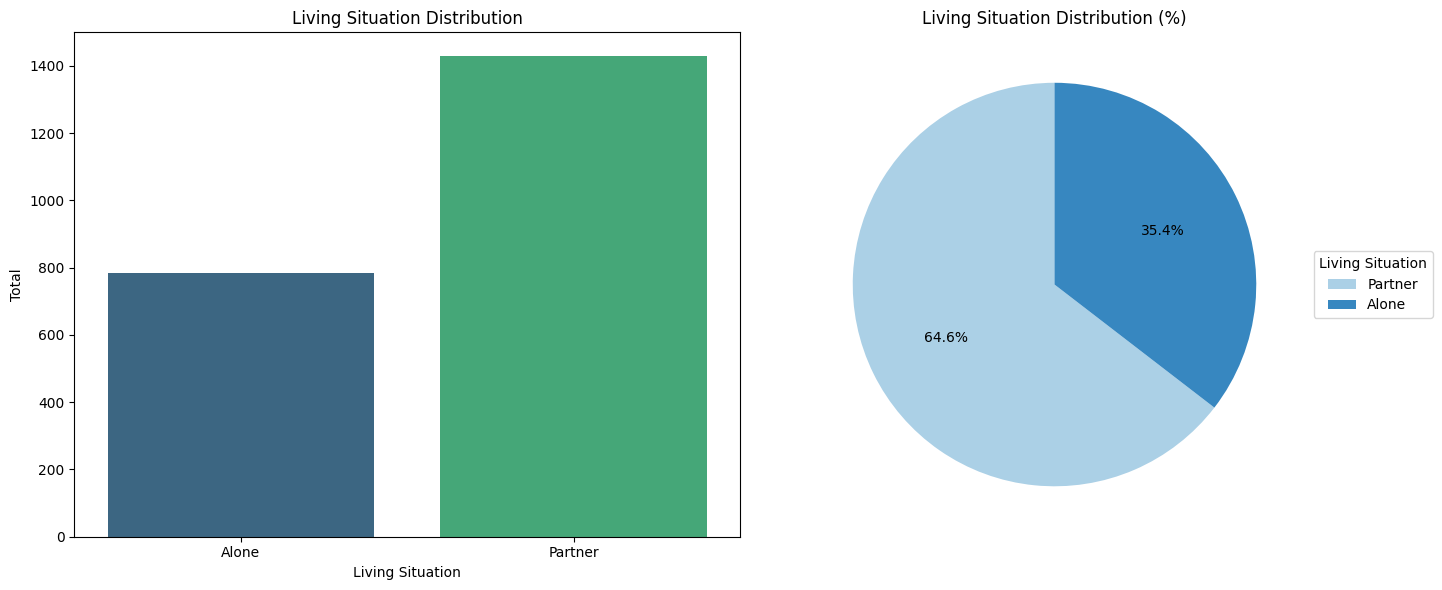

In [38]:
# Value counts and percentage
living_with_counts = data["Living_With"].value_counts()

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart 
sns.countplot(data=data, x="Living_With", ax=ax1, palette="viridis")
ax1.set_title("Living Situation Distribution")
ax1.set_xlabel("Living Situation")
ax1.set_ylabel("Total")
ax1.tick_params(axis="x", rotation=0)

# Pie Chart
wedges, texts, autotexts = ax2.pie(
    living_with_counts,
    autopct="%1.1f%%",  # Show percentage on the pie chart slices
    startangle=90,
    colors=sns.color_palette("Blues", len(living_with_counts))
)
ax2.set_title("Living Situation Distribution (%)")

# Add legend outside the pie chart
ax2.legend(
    wedges,
    living_with_counts.index,
    title="Living Situation",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Display plot
plt.tight_layout()
plt.show()

### **5. DISTRIBUTION OF FAMILY**

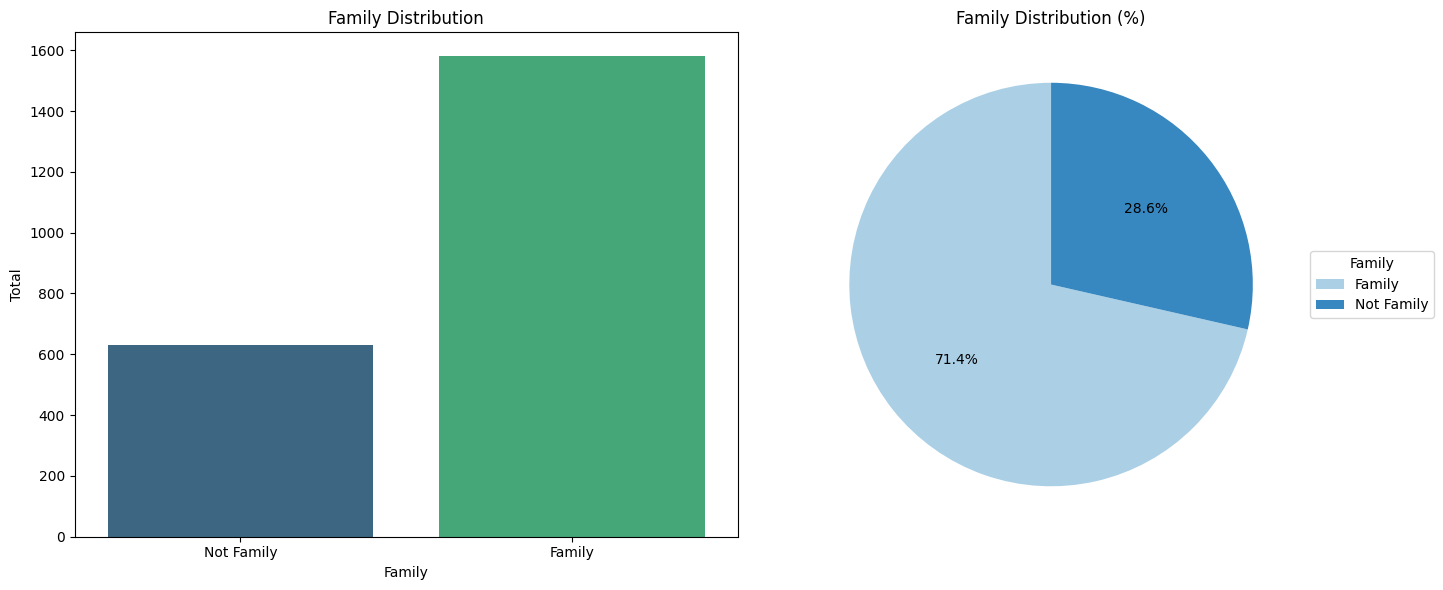

In [39]:
# Value counts and percentage
children_counts = data["Is_Family"].value_counts()

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart 
sns.countplot(data=data, x="Is_Family", ax=ax1, palette="viridis")
ax1.set_title("Family Distribution")
ax1.set_xlabel("Family")
ax1.set_ylabel("Total")
ax1.tick_params(axis="x", rotation=0)

# Pie Chart
wedges, texts, autotexts = ax2.pie(
    children_counts,
    autopct="%1.1f%%",  # Show percentage on the pie chart slices
    startangle=90,
    colors=sns.color_palette("Blues", len(children_counts))
)
ax2.set_title("Family Distribution (%)")

# Add legend outside the pie chart
ax2.legend(
    wedges,
    children_counts.index,
    title="Family",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Display plot
plt.tight_layout()
plt.show()

### **6. PRODUCT CATEGORY HAS THE HIGHEST PURCHASE**

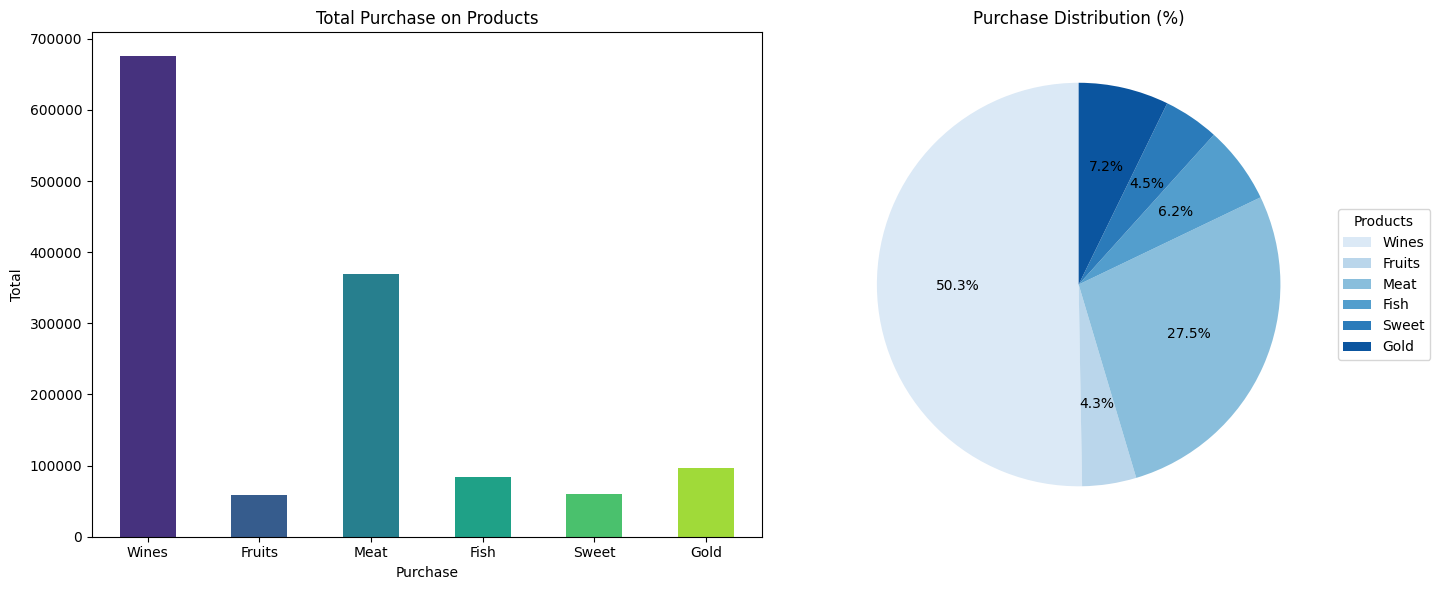

In [40]:
# Columns to plot
columns_to_plot = ["Wines", "Fruits", "Meat", "Fish", "Sweet", "Gold"]
total_spent = data[columns_to_plot].sum()

# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart
total_spent.plot(kind="bar", color=sns.color_palette("viridis", len(columns_to_plot)), ax=ax1)
ax1.set_title("Total Purchase on Products")
ax1.set_xlabel("Purchase")
ax1.set_ylabel("Total")
ax1.set_xticklabels(total_spent.index, rotation=0)

# Pie Chart
wedges, texts, autotexts = ax2.pie(
    total_spent,
    autopct="%1.1f%%",  # Show percentage on the pie chart slices
    startangle=90,
    colors=sns.color_palette("Blues", len(total_spent))
)
ax2.set_title("Purchase Distribution (%)")

# Add legend outside the pie chart
ax2.legend(
    wedges,
    total_spent.index,
    title="Products",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Adjust layout
plt.tight_layout()
plt.show()

### **7. INCOME DISTRIBUTION**

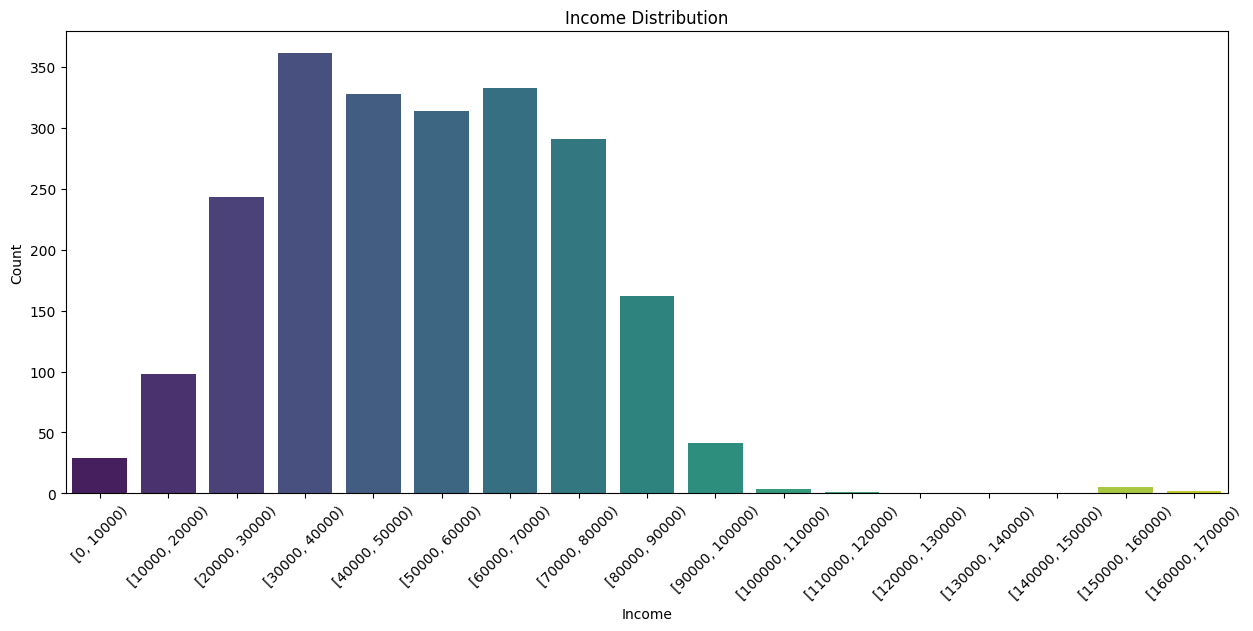

In [41]:
# Display income distribution in interval
data["Income_Binned"] = pd.cut(data["Income"], bins=range(0, 180000, 10000), right=False)
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(data=data, x="Income_Binned", palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Income Distribution")
plt.show()

### **8. THE PRFERRED PURCHASING CHANNEL**

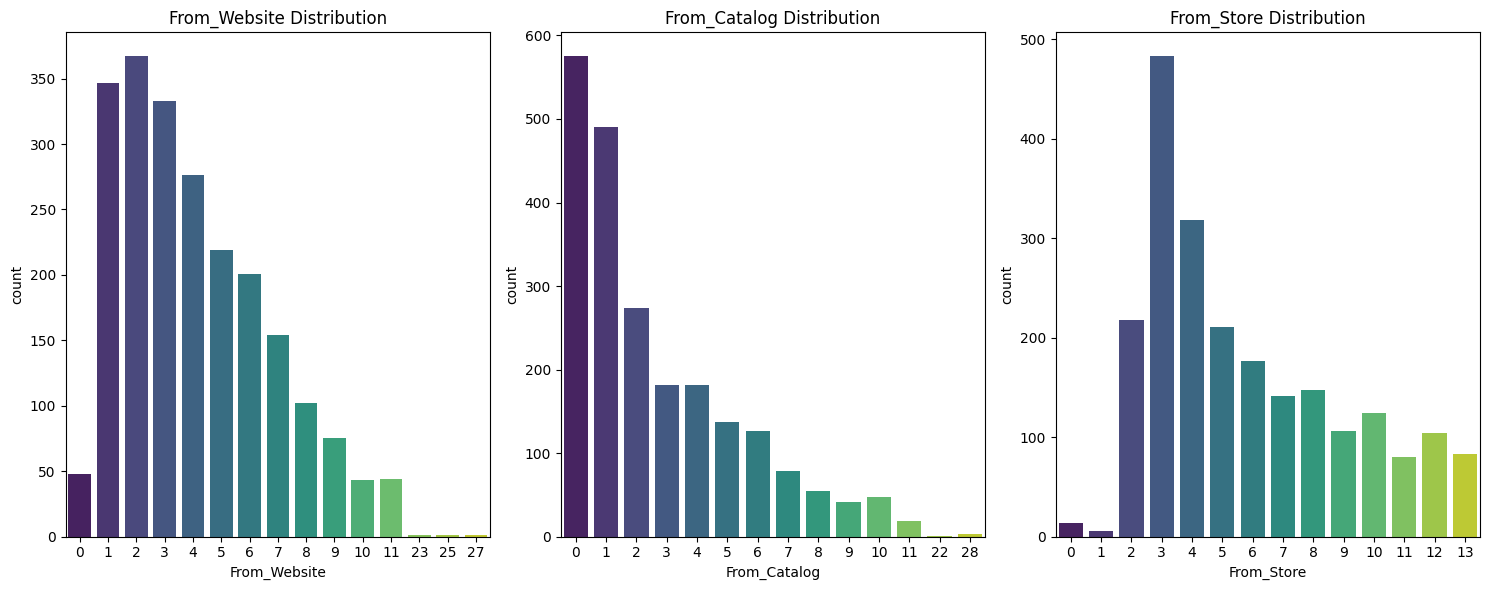

In [42]:
# Number of purchases distribution
columns_to_plot = ["From_Website", "From_Catalog", "From_Store"]

# Make subplot
fig, ax = plt.subplots(1, len(columns_to_plot), figsize=(15, 6))

for i, col in enumerate(columns_to_plot):
    sns.countplot(data=data, x=col, ax=ax[i], palette="viridis")
    ax[i].set_title(f"{col} Distribution")
    ax[i].tick_params(axis="x")

plt.tight_layout()
plt.show()

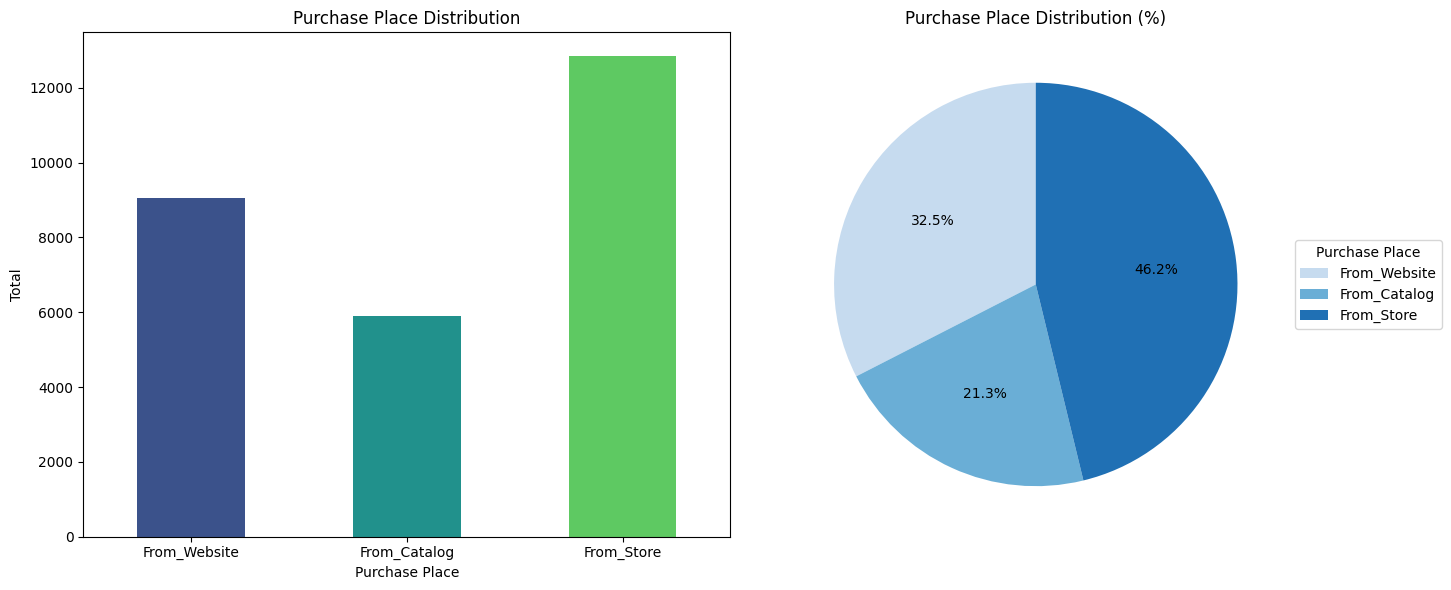

In [43]:
# Columns to plot
columns_to_plot = ["From_Website", "From_Catalog", "From_Store"]
total_spent = data[columns_to_plot].sum()

# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart
total_spent.plot(kind="bar", color=sns.color_palette("viridis", len(columns_to_plot)), ax=ax1)
ax1.set_title("Purchase Place Distribution")
ax1.set_xlabel("Purchase Place")
ax1.set_ylabel("Total")
ax1.set_xticklabels(total_spent.index, rotation=0)

# Pie Chart
wedges, texts, autotexts = ax2.pie(
    total_spent,
    autopct="%1.1f%%",  # Show percentage on the pie chart slices
    startangle=90,
    colors=sns.color_palette("Blues", len(total_spent))
)
ax2.set_title("Purchase Place Distribution (%)")

# Add legend outside the pie chart
ax2.legend(
    wedges,
    total_spent.index,
    title="Purchase Place",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Adjust layout
plt.tight_layout()
plt.show()

### **9. THE RATE OF ONLINE PURCHASING AND STORE PURCHASING**

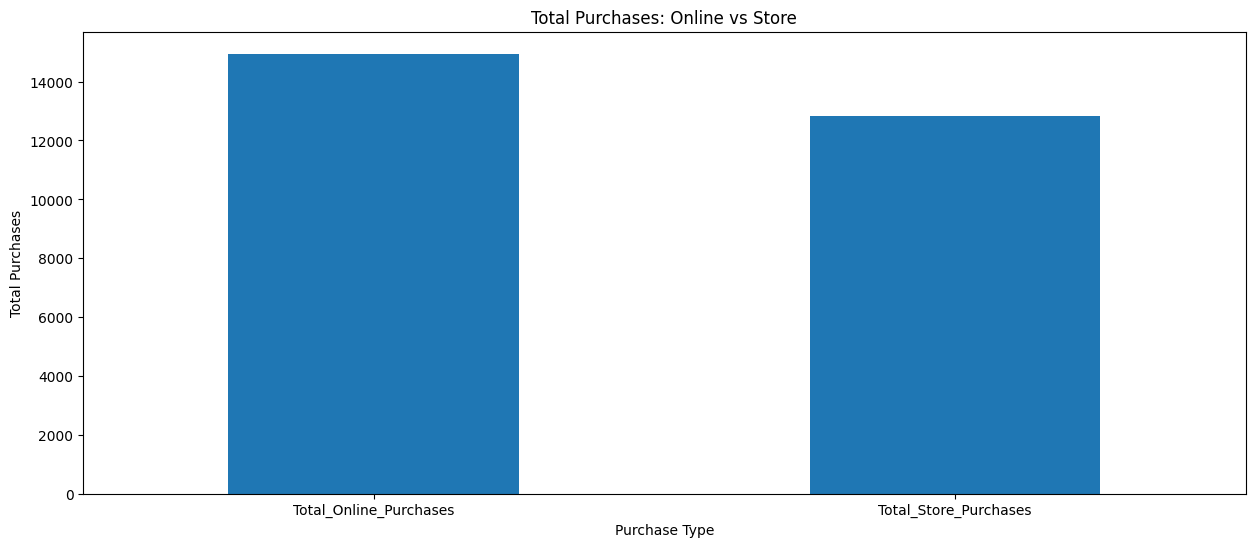

In [44]:
data["Total_Online_Purchases"] = data["From_Website"] + data["From_Catalog"]
data["Total_Store_Purchases"] = data["From_Store"]

online_vs_store = data[["Total_Online_Purchases", "Total_Store_Purchases"]].sum()
plt.figure(figsize=(15,6))
online_vs_store.plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Total Purchases: Online vs Store")
plt.xlabel("Purchase Type")
plt.ylabel("Total Purchases")
plt.show()

### **10. CUSTOMER ACCEPTED EACH MARKETING CAMPAIGN**

In [45]:
data.columns

Index(['ID', 'Year_Birth', 'Age', 'Age_Group', 'Education', 'Living_With',
       'Marital_Status', 'Kidhome', 'Teenhome', 'Children', 'Is_Family',
       'Income', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweet', 'Gold', 'Total_Spent', 'Discount', 'From_Website',
       'From_Catalog', 'From_Store', 'Total_Place', 'Web_Visit/Month',
       'Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4', 'Campaign_5',
       'Last_Campaign', 'Total_Participation', 'Complain', 'Income_Binned',
       'Total_Online_Purchases', 'Total_Store_Purchases'],
      dtype='object')

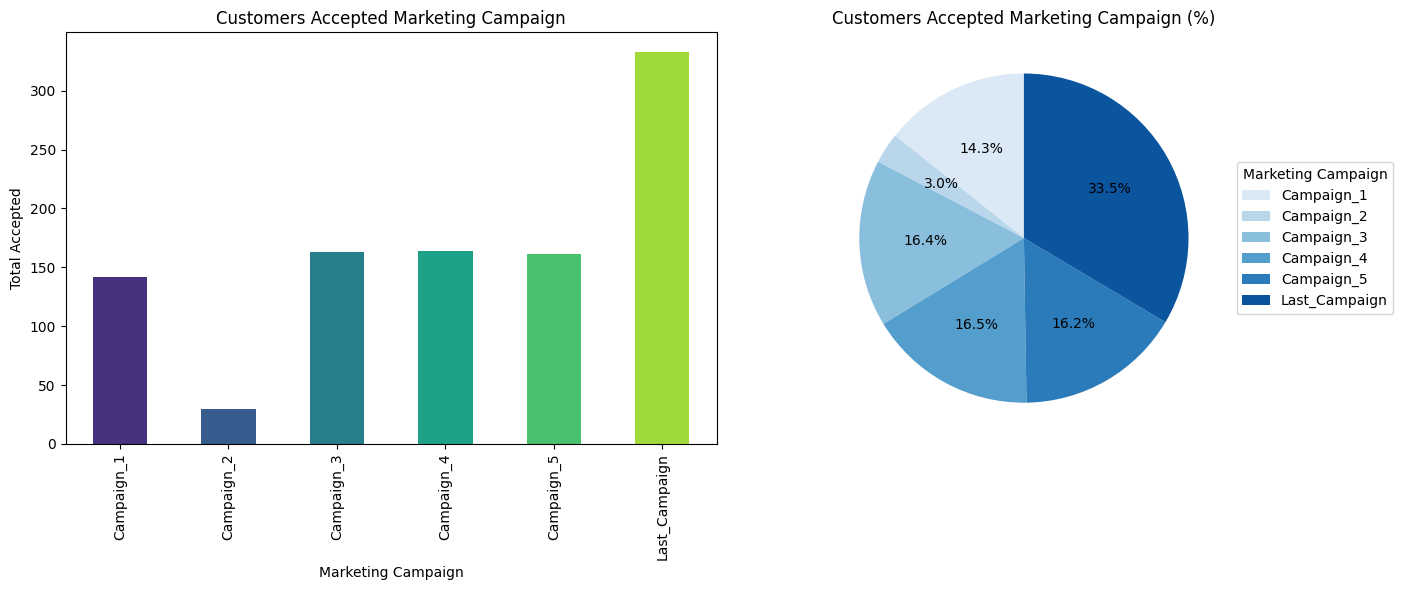

In [46]:
# Columns to plot
columns_to_plot = ['Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4', 'Campaign_5', 'Last_Campaign']
total_accept = data[columns_to_plot].sum()

# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart
total_accept.plot(kind="bar", color=sns.color_palette("viridis", len(columns_to_plot)), ax=ax1)
ax1.set_title("Customers Accepted Marketing Campaign")
ax1.set_xlabel("Marketing Campaign")
ax1.set_ylabel("Total Accepted")
ax1.set_xticklabels(total_accept.index, rotation=90)

# Pie Chart
wedges, texts, autotexts = ax2.pie(
    total_accept,
    autopct="%1.1f%%",  # Show percentage on the pie chart slices
    startangle=90,
    colors=sns.color_palette("Blues", len(total_accept))
)
ax2.set_title("Customers Accepted Marketing Campaign (%)")

# Add legend outside the pie chart
ax2.legend(
    wedges,
    total_accept.index,
    title="Marketing Campaign",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Adjust layout
plt.tight_layout()
plt.show()

### **11. DISTRIBUTION OF THE NUMBER OF CHILDREN (KIDHOME AND TEENHOME)**

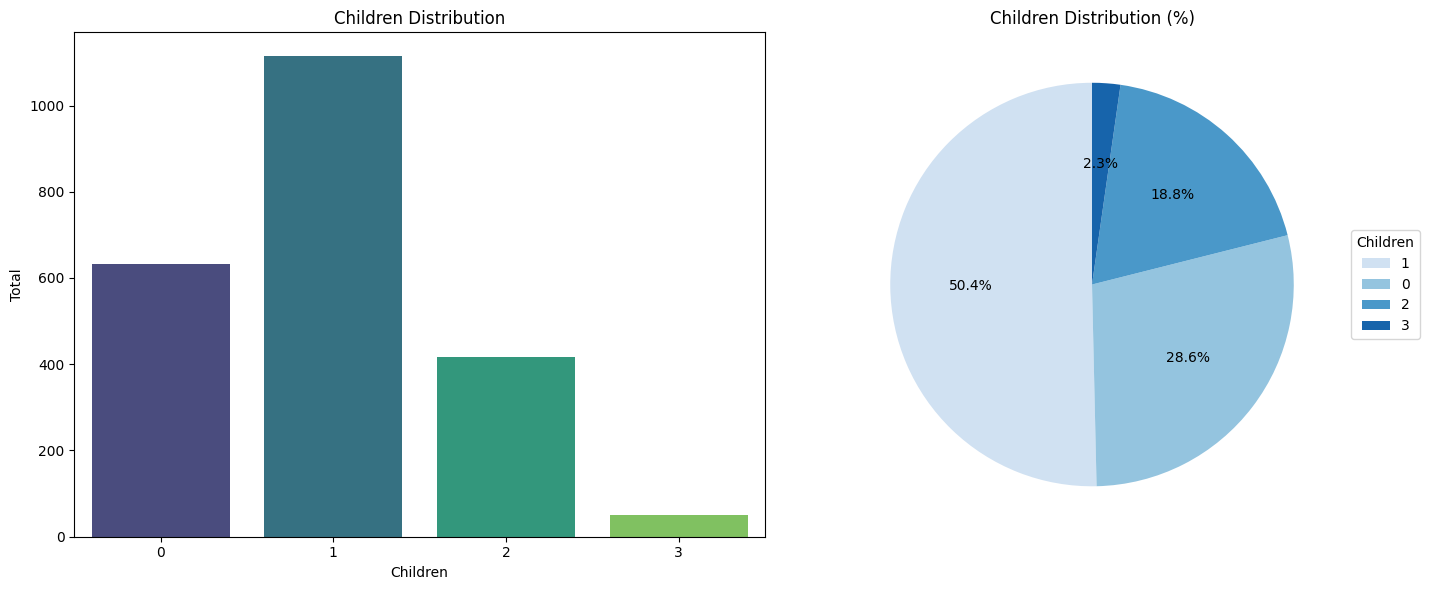

In [47]:
# Value counts and percentage
children_counts = data["Children"].value_counts()

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart 
sns.countplot(data=data, x="Children", ax=ax1, palette="viridis")
ax1.set_title("Children Distribution")
ax1.set_xlabel("Children")
ax1.set_ylabel("Total")
ax1.tick_params(axis="x", rotation=0)

# Pie Chart
wedges, texts, autotexts = ax2.pie(
    children_counts,
    autopct="%1.1f%%",  # Show percentage on the pie chart slices
    startangle=90,
    colors=sns.color_palette("Blues", len(children_counts))
)
ax2.set_title("Children Distribution (%)")

# Add legend outside the pie chart
ax2.legend(
    wedges,
    children_counts.index,
    title="Children",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Display plot
plt.tight_layout()
plt.show()

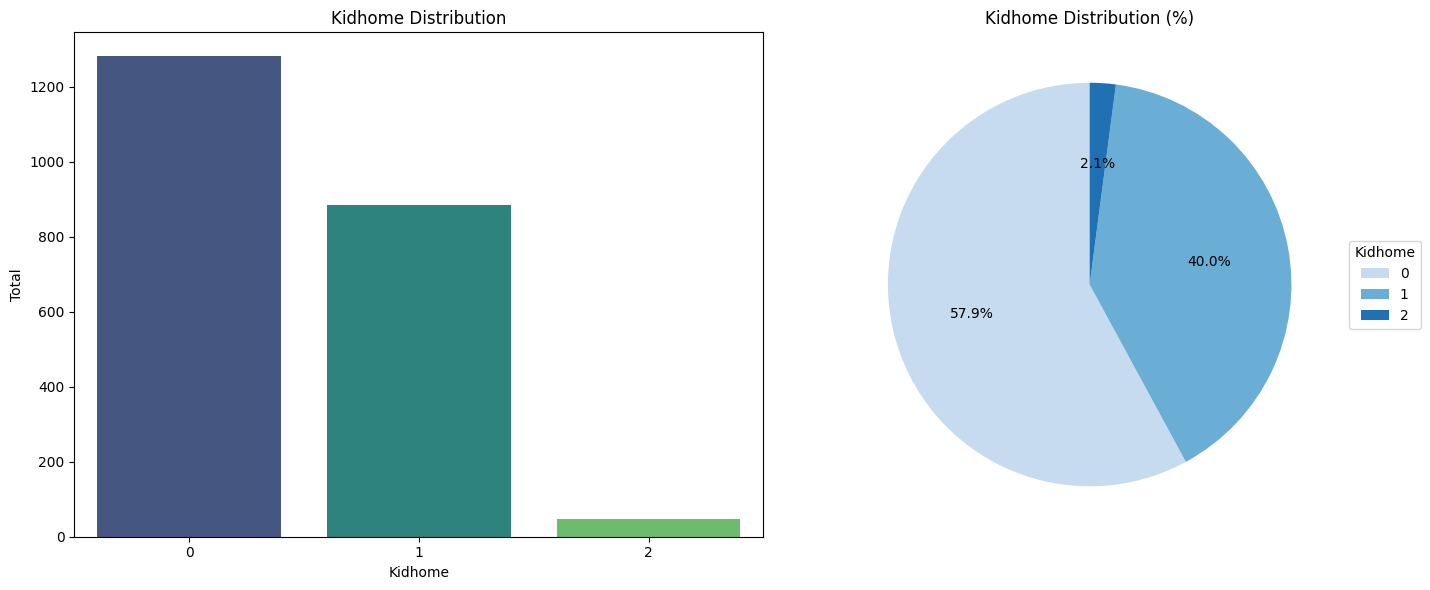

In [48]:
# Value counts and percentage
kidhome_counts = data["Kidhome"].value_counts()

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart 
sns.countplot(data=data, x="Kidhome", ax=ax1, palette="viridis")
ax1.set_title("Kidhome Distribution")
ax1.set_xlabel("Kidhome")
ax1.set_ylabel("Total")
ax1.tick_params(axis="x", rotation=0)

# Pie Chart
wedges, texts, autotexts = ax2.pie(
    kidhome_counts,
    autopct="%1.1f%%",  # Show percentage on the pie chart slices
    startangle=90,
    colors=sns.color_palette("Blues", len(kidhome_counts))
)
ax2.set_title("Kidhome Distribution (%)")

# Add legend outside the pie chart
ax2.legend(
    wedges,
    kidhome_counts.index,
    title="Kidhome",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Display plot
plt.tight_layout()
plt.show()

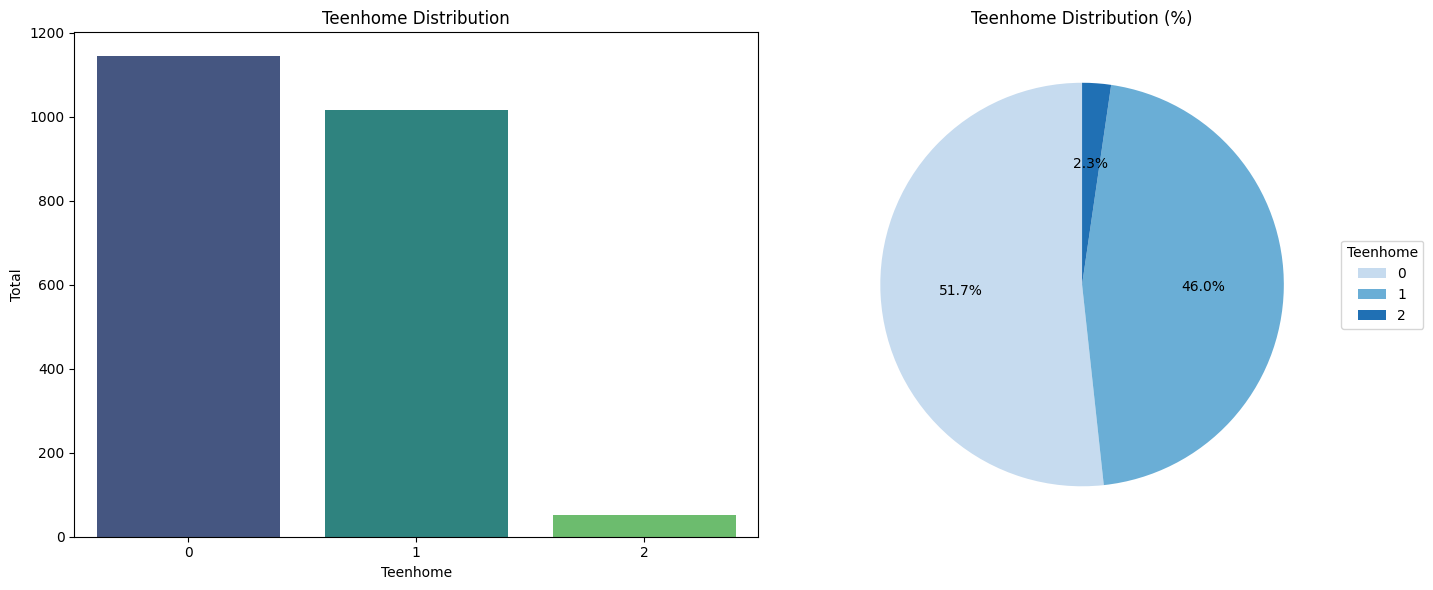

In [49]:
# Value counts and percentage
teenhome_counts = data["Teenhome"].value_counts()

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart 
sns.countplot(data=data, x="Teenhome", ax=ax1, palette="viridis")
ax1.set_title("Teenhome Distribution")
ax1.set_xlabel("Teenhome")
ax1.set_ylabel("Total")
ax1.tick_params(axis="x", rotation=0)

# Pie Chart
wedges, texts, autotexts = ax2.pie(
    teenhome_counts,
    autopct="%1.1f%%",  # Show percentage on the pie chart slices
    startangle=90,
    colors=sns.color_palette("Blues", len(teenhome_counts))
)
ax2.set_title("Teenhome Distribution (%)")

# Add legend outside the pie chart
ax2.legend(
    wedges,
    teenhome_counts.index,
    title="Teenhome",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Display plot
plt.tight_layout()
plt.show()

### **12. PERCENTAGE OF CUSTOMERS HAVE FILED A COMPLAIN**

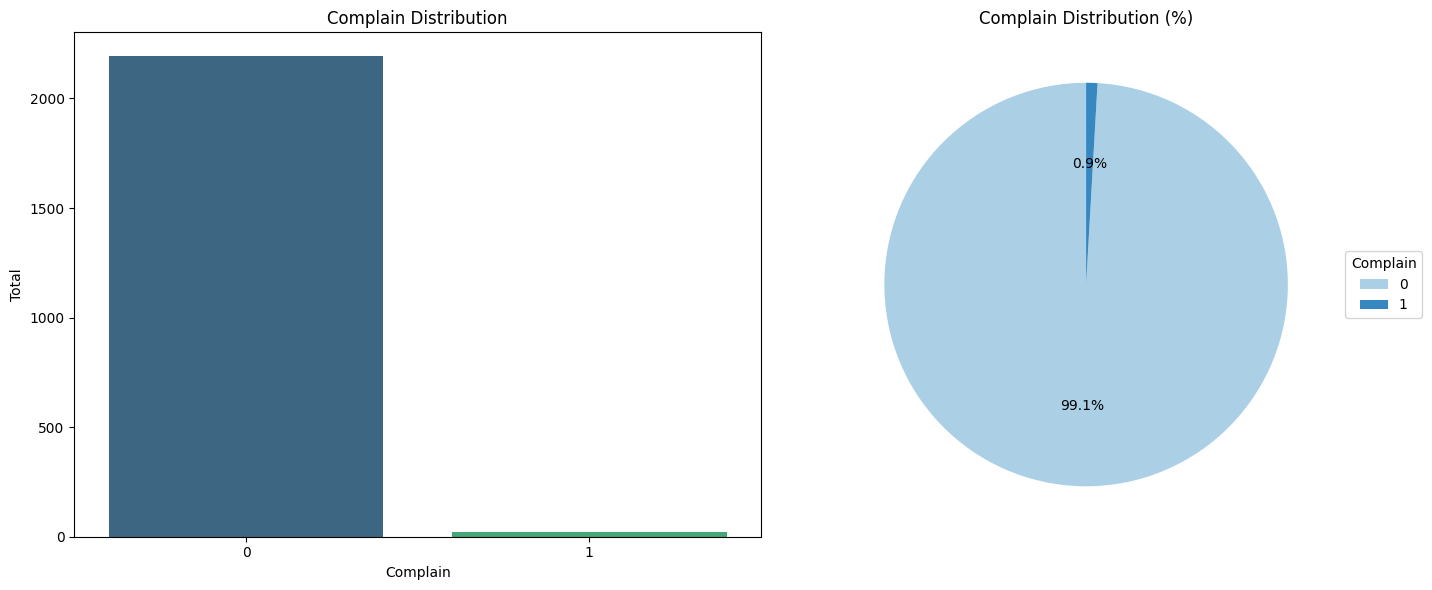

In [50]:
# Value counts and percentage
complain_counts = data["Complain"].value_counts()

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart 
sns.countplot(data=data, x="Complain", ax=ax1, palette="viridis")
ax1.set_title("Complain Distribution")
ax1.set_xlabel("Complain")
ax1.set_ylabel("Total")
ax1.tick_params(axis="x", rotation=0)

# Pie Chart
wedges, texts, autotexts = ax2.pie(
    complain_counts,
    autopct="%1.1f%%",  # Show percentage on the pie chart slices
    startangle=90,
    colors=sns.color_palette("Blues", len(complain_counts))
)
ax2.set_title("Complain Distribution (%)")

# Add legend outside the pie chart
ax2.legend(
    wedges,
    kidhome_counts.index,
    title="Complain",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Display plot
plt.tight_layout()
plt.show()

### **13. DISTRIBUTION OF RECENCY**

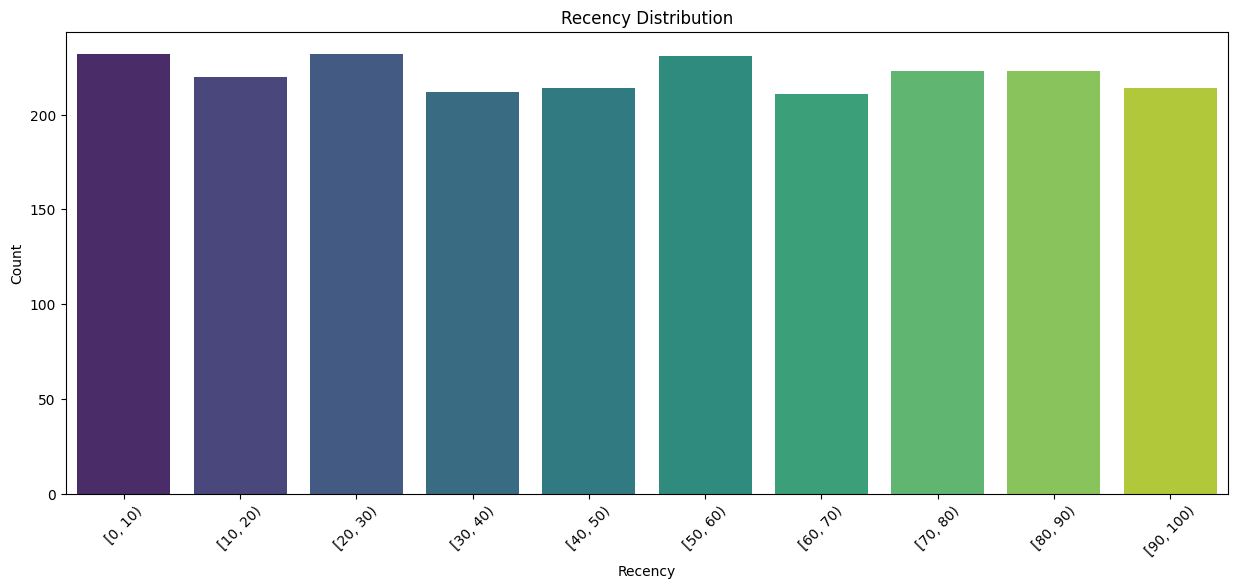

In [51]:
data["Recency_Binned"] = pd.cut(data["Recency"], bins=range(0, 101, 10), right=False)
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(data=data, x="Recency_Binned", palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Recency")
plt.ylabel("Count")
plt.title("Recency Distribution")
plt.show()

## **D. DEMOGRAPHIC EDA**

### **1. Campaign Participation**

In [52]:
count = data[['Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4', 'Campaign_5', 'Last_Campaign']].apply(pd.value_counts).transpose()
count

,0,1
Campaign_1,2070,142
Campaign_2,2182,30
Campaign_3,2049,163
Campaign_4,2048,164
Campaign_5,2051,161
Last_Campaign,1879,333


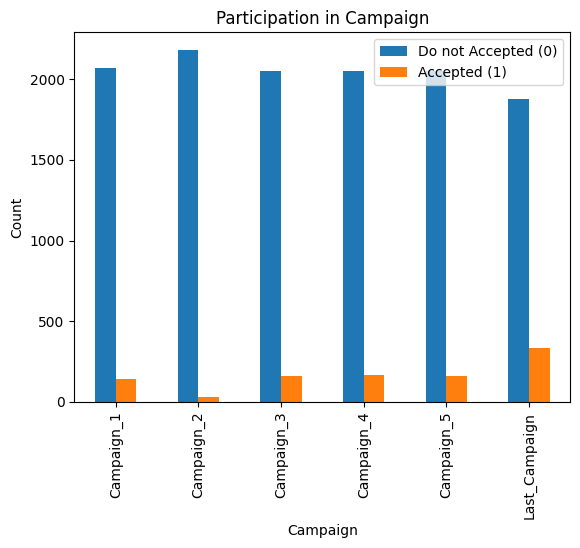

In [53]:
count.plot(kind='bar')
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.title('Participation in Campaign')
plt.legend(['Do not Accepted (0)', 'Accepted (1)'])
plt.xticks(rotation = 90)
plt.show()

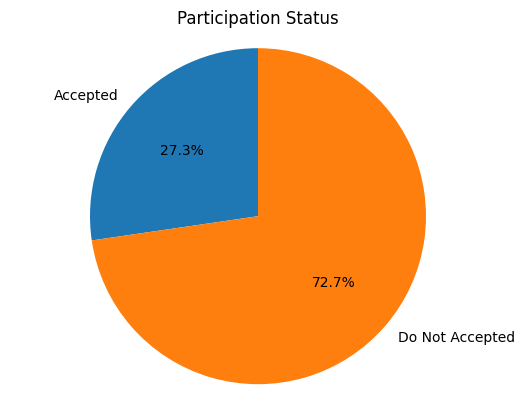

In [54]:
participated = {'type' : ['Accepted', 'Do Not Accepted'],
                'count' : [data[data['Total_Participation'] != 0]['ID'].count(), data[data['Total_Participation'] == 0]['ID'].count()]}

Accepted = pd.DataFrame(participated)
plt.pie(Accepted['count'], labels=Accepted['type'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Participation Status')
plt.show()

**Problem**

Banyak pelanggan yang tidak berpartisipasi dalam kampanye dan hanya 27% yang pernah berpartisipasi
Namun, jika kita perhatikan dengan seksama jumlah pelanggan yang berpartisipasi, ada harapan bahwa kampanye ini dapat berjalan lebih baik di lain waktu. Pada kampanye terakhir, kita melihat peningkatan signifikan dalam jumlah peserta, dua kali lipat dari jumlah peserta kampanye terakhir dan keseluruhan sebelumnya.

Untuk merumuskan kampanye berikutnya dengan lebih baik, kita harus merancang kampanye dengan hati-hati berdasarkan evaluasi kita terhadap kampanye sebelumnya.

Kita harus melihat apa yang mungkin terjadi pada kampanye terakhir untuk merumuskan kampanye berikutnya. Dan juga, melihat kampanye ke-2 yang gagal mengumpulkan peserta, jadi kita tidak mengulangi kesalahan yang sama pada kampanye berikutnya.

Berdasarkan data yang diberikan,
Kita dapat melihat demografi untuk target audiens potensial, jadi banyak yang akan berpartisipasi dalam kampanye berikutnya.

Kita dapat mencoba mengintegrasikan diskon ke dalam kampanye.

Kita dapat meningkatkan salah satu saluran pembelian kita untuk kampanye yang efektif

Kita harus mencari siapa target terbaik kita


### **2. Demographic**

#### **A. Age Grouping**

<Axes: xlabel='Age_Group', ylabel='Total_Participation'>

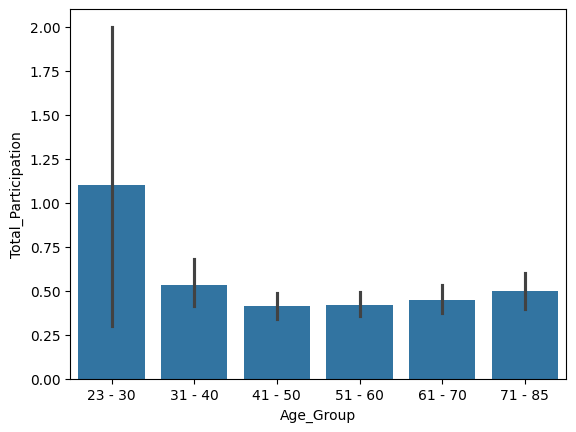

In [55]:
age_order = ['23 - 30','31 - 40','41 - 50','51 - 60','61 - 70','71 - 85']

sns.barplot(data, x = 'Age_Group', y = 'Total_Participation', order = age_order)

In [56]:
age_count= data['Age_Group'].value_counts()
age_count

Age_Group
51 - 60    641
41 - 50    583
61 - 70    467
71 - 85    264
31 - 40    247
23 - 30     10
Name: count, dtype: int64

##### Mencari persentase Campaign yang Diterima untuk setiap kelompok umur

In [57]:
age_distribution = age_count / data.shape[0]
age_distribution = age_distribution.reset_index()
age_distribution.columns = ['Age_Group', 'Persentase']
age_distribution.sort_values(by = 'Age_Group', inplace = True)
age_distribution

,Age_Group,Persentase
5,23 - 30,0.004521
4,31 - 40,0.111664
1,41 - 50,0.263562
0,51 - 60,0.289783
2,61 - 70,0.211121
3,71 - 85,0.119349


##### **Menghitung total partisipasi untuk setiap age group**

In [58]:
# Mengelompokkan berdasarkan pendidikan dan menghitung total partisipasi
age_group_participation = data.groupby('Age_Group')['Total_Participation'].sum().reset_index()

# Mengurutkan berdasarkan total partisipasi tertinggi
age_group_participation = age_group_participation.sort_values(by='Total_Participation', ascending=False)

age_group_participation

,Age_Group,Total_Participation
3,51 - 60,270
2,41 - 50,240
4,61 - 70,210
1,31 - 40,131
5,71 - 85,131
0,23 - 30,11


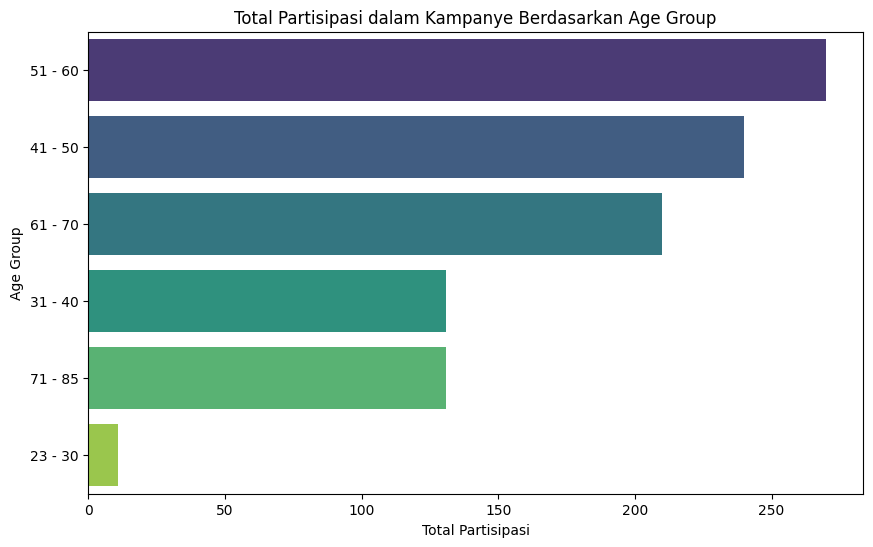

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Participation', y='Age_Group', data=age_group_participation, palette='viridis')

plt.title('Total Partisipasi dalam Kampanye Berdasarkan Age Group')
plt.xlabel('Total Partisipasi')
plt.ylabel('Age Group')
plt.show()

Dari Plot diatas dapat dilihat bahwa kelompok umu 51-60 paling banyak menerima campaign yang telah dilakukakn.

##### **Menganalisis Partisipasi dalam Setiap Kampanye Berdasarkan Age Group**

In [60]:
campaign_columns = ['Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4', 'Campaign_5']

# Menghitung partisipasi per kampanye berdasarkan pendidikan
campaign_participation_by_age_group = data.groupby('Age_Group')[campaign_columns].sum().reset_index()

campaign_participation_by_age_group

,Age_Group,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5
0,23 - 30,1,1,2,1,3
1,31 - 40,23,2,27,9,26
2,41 - 50,33,5,47,32,39
3,51 - 60,27,10,47,53,38
4,61 - 70,35,11,26,44,29
5,71 - 85,23,1,14,25,26


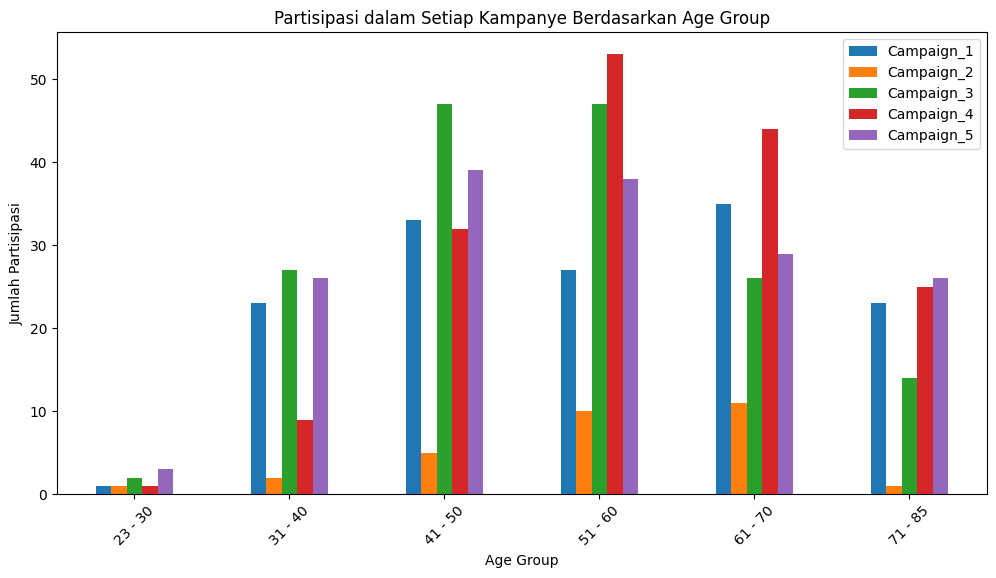

In [61]:
campaign_participation_by_age_group.set_index('Age_Group').plot(kind='bar', stacked=False, figsize=(12, 6))

plt.title('Partisipasi dalam Setiap Kampanye Berdasarkan Age Group')
plt.xlabel('Age Group')
plt.ylabel('Jumlah Partisipasi')
plt.xticks(rotation=45)
plt.show()

##### **Menilai Kampanye Terbaik untuk Ditargetkan pada Kampanye Berikutnya**
Untuk menemukan kampanye yang lebih efektif untuk setiap age group, kita bisa melihat rata-rata partisipasi pada setiap kampanye. Jika ada kampanye yang memiliki partisipasi rendah pada group tertentu, kita bisa menargetkan kampanye tersebut kepada age group yang kurang berpartisipasi.

- Rata-Rata Partisipasi Per Kampanye Berdasarkan Age Group

In [62]:
avg_campaign_participation_by_age_group = data.groupby('Age_Group')[campaign_columns].mean()
avg_campaign_participation_by_age_group

,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5
Age_Group,,,,,
23 - 30,0.100000,0.100000,0.200000,0.100000,0.300000
31 - 40,0.093117,0.008097,0.109312,0.036437,0.105263
41 - 50,0.056604,0.008576,0.080617,0.054889,0.066895
51 - 60,0.042122,0.015601,0.073323,0.082683,0.059282
61 - 70,0.074946,0.023555,0.055675,0.094218,0.062099
71 - 85,0.087121,0.003788,0.053030,0.094697,0.098485


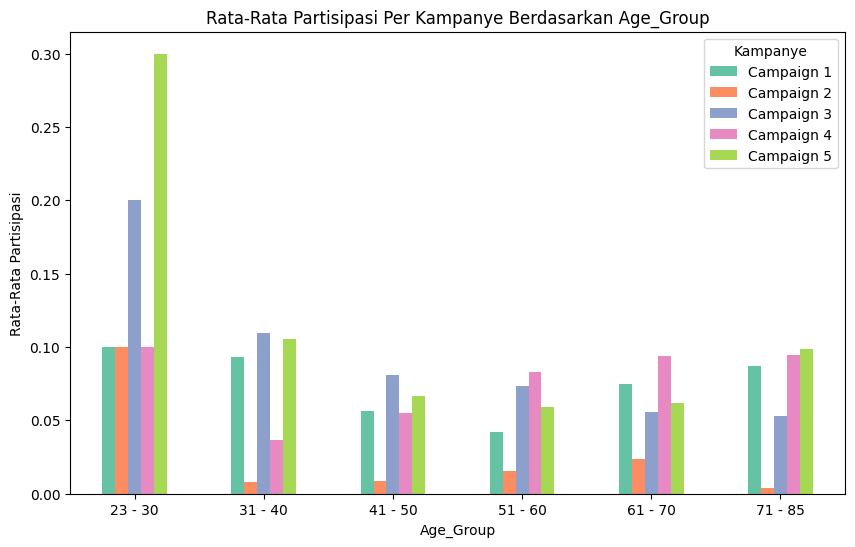

In [63]:
avg_campaign_participation_by_age_group.plot(kind='bar', figsize=(10, 6), color=sns.color_palette('Set2'))
plt.title('Rata-Rata Partisipasi Per Kampanye Berdasarkan Age_Group')
plt.xlabel('Age_Group')
plt.ylabel('Rata-Rata Partisipasi')
plt.xticks(rotation=0)
plt.legend(title='Kampanye', labels=['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5'])
plt.show()

#### **B. Education**

Kita akan mencoba mencari pendidikan mana yang paling banyak berpartisipasi dalam kampanye untuk melihat masalah yang terjadi dan pendidikan apa yang paling baik untuk ditargetkan pada kampanye berikutnya.

##### **Menghitung total partisipasi untuk setiap tingkat pendidikan**

In [118]:
education = data['Education'].value_counts()
education

Education
Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: count, dtype: int64

In [64]:
# Mengelompokkan berdasarkan pendidikan dan menghitung total partisipasi
education_participation = data.groupby('Education')['Total_Participation'].sum().reset_index()

# Mengurutkan berdasarkan total partisipasi tertinggi
education_participation = education_participation.sort_values(by='Total_Participation', ascending=False)

education_participation

,Education,Total_Participation
2,Graduation,491
4,PhD,264
3,Master,158
0,2n Cycle,72
1,Basic,8


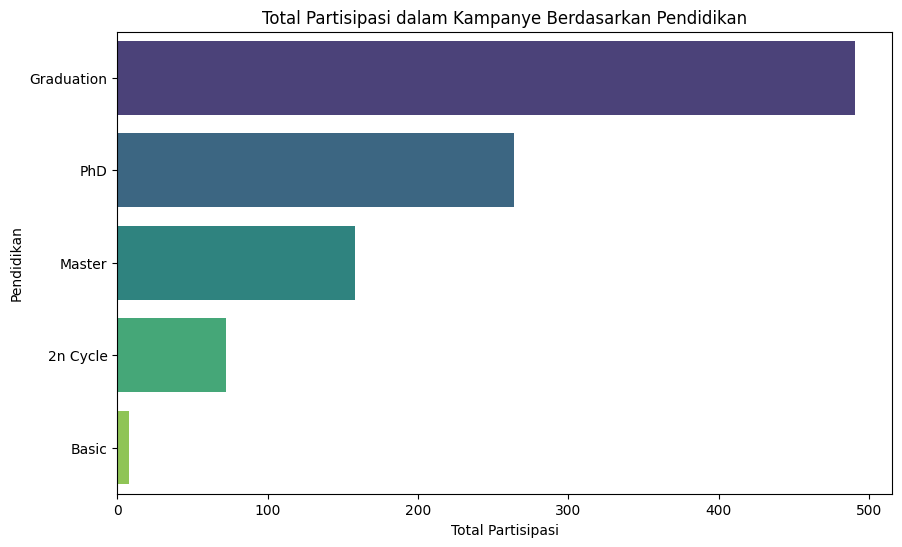

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Participation', y='Education', data=education_participation, palette='viridis')

plt.title('Total Partisipasi dalam Kampanye Berdasarkan Pendidikan')
plt.xlabel('Total Partisipasi')
plt.ylabel('Pendidikan')
plt.show()

##### **Menganalisis Partisipasi dalam Setiap Kampanye Berdasarkan Pendidikan**

In [66]:
campaign_columns = ['Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4', 'Campaign_5']

# Menghitung partisipasi per kampanye berdasarkan pendidikan
campaign_participation_by_education = data.groupby('Education')[campaign_columns].sum().reset_index()

campaign_participation_by_education

,Education,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5
0,2n Cycle,14,2,15,9,10
1,Basic,0,0,6,0,0
2,Graduation,80,16,78,79,86
3,Master,18,2,24,31,27
4,PhD,30,10,40,45,38


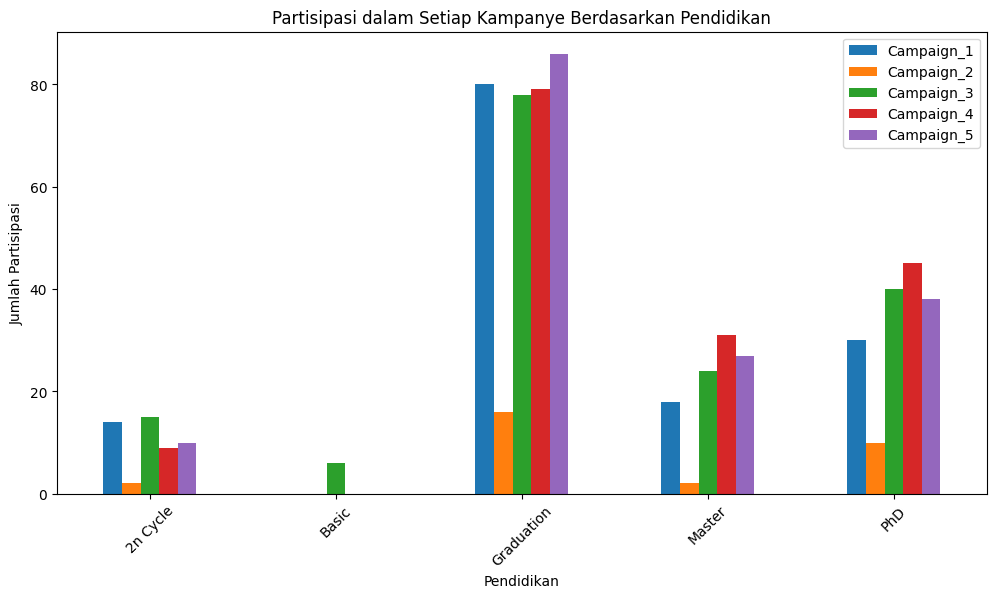

In [67]:
campaign_participation_by_education.set_index('Education').plot(kind='bar', stacked=False, figsize=(12, 6))

plt.title('Partisipasi dalam Setiap Kampanye Berdasarkan Pendidikan')
plt.xlabel('Pendidikan')
plt.ylabel('Jumlah Partisipasi')
plt.xticks(rotation=45)
plt.show()

1. Total Partisipasi Berdasarkan Pendidikan
   Dari grafik pertama, terlihat bahwa:
   - Tingkat pendidikan "Graduation" memiliki partisipasi paling tinggi dalam kampanye, dengan jumlah mendekati 500.
   - Diikuti oleh "PhD" dan "Master" dengan partisipasi yang cukup tinggi.
   - Tingkat pendidikan "2n Cycle" dan "Basic" memiliki jumlah partisipasi yang jauh lebih rendah.

   Interpretasi: Orang-orang dengan tingkat pendidikan "Graduation" paling banyak terlibat dalam kampanye, menunjukkan ketertarikan yang lebih besar atau mungkin akses yang lebih baik ke kampanye dibandingkan dengan tingkat pendidikan yang lebih rendah.

2. Partisipasi per Kampanye Berdasarkan Pendidikan
   Dari grafik kedua, terlihat perincian partisipasi dalam tiap kampanye berdasarkan tingkat pendidikan:
   - **Graduation**: Kampanye 1 dan 5 menarik lebih banyak peserta dengan pendidikan "Graduation" dibandingkan kampanye lainnya.
   - **PhD**: Partisipasi tertinggi pada kampanye 3, diikuti oleh kampanye 1 dan 5.
   - **Master**: Kampanye 3 memiliki partisipasi tertinggi untuk peserta dengan gelar Master, diikuti oleh kampanye 4 dan 5.
   - **2n Cycle**: Kampanye 3 menarik partisipasi terbanyak di kelompok ini.
   - **Basic**: Partisipasi sangat rendah secara keseluruhan, tetapi sedikit lebih tinggi pada kampanye 3.

   Interpretasi: Kampanye 3 tampaknya cukup menarik bagi berbagai kelompok pendidikan, terutama untuk mereka dengan pendidikan Master, PhD, dan 2n Cycle. Kampanye 1 dan 5 menarik lebih banyak peserta dari kelompok "Graduation".

3. Menentukan Pendidikan yang Paling Baik untuk Kampanye Berikutnya
   Berdasarkan hasil di atas:
   - Fokus pada peserta dengan pendidikan "Graduation" dapat meningkatkan jumlah partisipasi secara keseluruhan, karena kelompok ini memiliki partisipasi tertinggi.
   - Kampanye selanjutnya juga dapat mempertimbangkan strategi untuk menarik kelompok dengan pendidikan PhD dan Master, yang menunjukkan keterlibatan tinggi di kampanye-kampanye tertentu.
   - Jika targetnya adalah meningkatkan partisipasi di semua tingkat pendidikan, kampanye yang menarik untuk kelompok "2n Cycle" dan "Basic" juga bisa ditingkatkan, meskipun kelompok ini mungkin membutuhkan pendekatan khusus mengingat partisipasinya yang rendah.

Kesimpulan: Kampanye berikutnya bisa paling efektif jika berfokus pada kelompok dengan pendidikan "Graduation" sambil mempertahankan daya tarik bagi kelompok "PhD" dan "Master".

#### **C. Marital Status**

Kita akan mencoba mencari  marital_status mana yang paling banyak berpartisipasi dalam kampanye untuk melihat permasalahan yang terjadi dan marital_status mana yang paling baik untuk ditargetkan pada kampanye berikutnya.

##### **Menghitung Total Partisipasi Berdasarkan Marital_Status**

menghitung total partisipasi berdasarkan kolom Marital_status untuk melihat kelompok mana yang memiliki tingkat partisipasi lebih tinggi.

In [119]:
marital = data['Marital_Status'].value_counts()
marital

Marital_Status
Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [68]:
participation_by_marital_status = data.groupby('Marital_Status')['Total_Participation'].sum().reset_index()
participation_by_marital_status

,Marital_Status,Total_Participation
0,Absurd,3
1,Alone,2
2,Divorced,116
3,Married,358
4,Single,242
5,Together,226
6,Widow,45
7,YOLO,1


##### **Menghitung Rata-rata Partisipasi Berdasarkan Marital_Status**

menghitung rata-rata partisipasi berdasarkan Marital_Status untuk melihat kelompok mana yang memiliki rata-rata partisipasi lebih tinggi.

In [69]:
avg_participation_by_marital_status = data.groupby('Marital_Status')['Total_Participation'].mean().reset_index()
avg_participation_by_marital_status

,Marital_Status,Total_Participation
0,Absurd,1.500000
1,Alone,0.666667
2,Divorced,0.502165
3,Married,0.417736
4,Single,0.514894
5,Together,0.395797
6,Widow,0.592105
7,YOLO,0.500000


##### **Menghitung Total Partisipasi Berdasarkan Kampanye untuk Setiap Marital_Status**

In [70]:
campaign_columns = ['Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4', 'Campaign_5']

# Menghitung total partisipasi di setiap kampanye berdasarkan Marital_Status
campaign_participation_by_marital_status = data.groupby('Marital_Status')[campaign_columns].sum()

campaign_participation_by_marital_status

,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5
Marital_Status,,,,,
Absurd,1,0,0,0,1
Alone,0,0,1,0,0
Divorced,12,5,20,18,13
Married,62,7,63,62,66
Single,30,5,38,32,31
Together,32,12,37,42,43
Widow,5,1,4,10,7
YOLO,0,0,0,0,0


##### **Visualisasi: Barplot untuk Perbandingan Partisipasi Berdasarkan Marital_Status**

- Total Partisipasi Berdasarkan Marital_Status

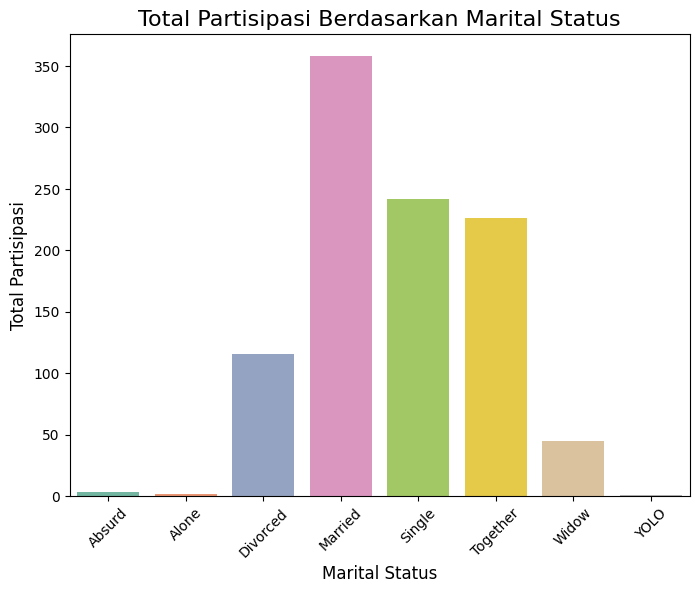

In [71]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital_Status', y='Total_Participation', data=participation_by_marital_status, palette='Set2')
plt.title('Total Partisipasi Berdasarkan Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Total Partisipasi', fontsize=12)
plt.xticks(rotation=45)  # Memutar sumbu x jika nama status terlalu panjang
plt.show()

- Rata-Rata Partisipasi Berdasarkan Marital_Status

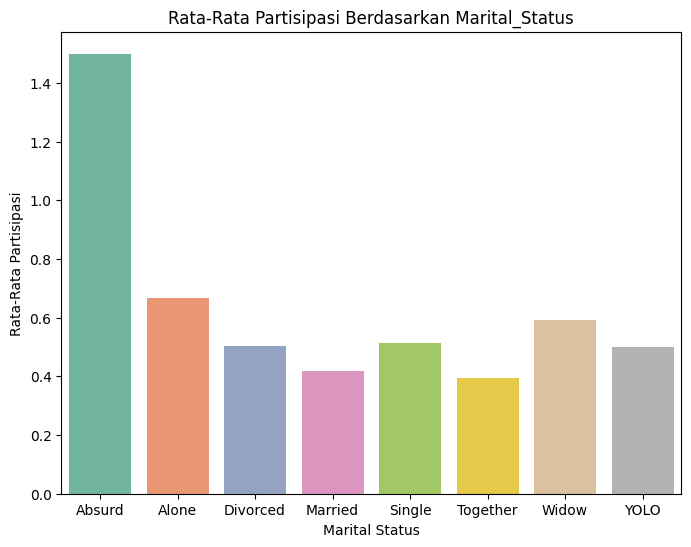

In [72]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital_Status', y='Total_Participation', data=avg_participation_by_marital_status, palette='Set2')
plt.title('Rata-Rata Partisipasi Berdasarkan Marital_Status')
plt.xlabel('Marital Status')
plt.ylabel('Rata-Rata Partisipasi')
plt.show()

- Total Partisipasi di Setiap Kampanye Berdasarkan Marital_Status

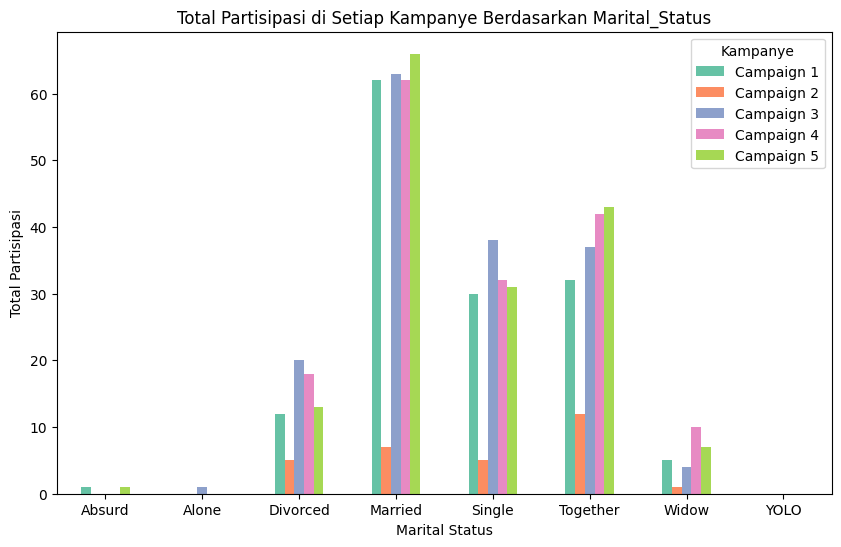

In [73]:
campaign_participation_by_marital_status.plot(kind='bar', figsize=(10, 6), color=sns.color_palette('Set2'))
plt.title('Total Partisipasi di Setiap Kampanye Berdasarkan Marital_Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Partisipasi')
plt.xticks(rotation=0)
plt.legend(title='Kampanye', labels=['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5'])
plt.show()

##### **Menilai Kampanye Terbaik untuk Ditargetkan pada Kampanye Berikutnya**

Untuk menemukan kampanye yang lebih efektif untuk setiap status perkawinan, kita bisa melihat rata-rata partisipasi pada setiap kampanye. Jika ada kampanye yang memiliki partisipasi rendah pada status tertentu, kita bisa menargetkan kampanye tersebut kepada status perkawinan yang kurang berpartisipasi.

- Rata-Rata Partisipasi Per Kampanye Berdasarkan Marital_Status

In [74]:
avg_campaign_participation_by_marital_status = data.groupby('Marital_Status')[campaign_columns].mean()
avg_campaign_participation_by_marital_status

,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5
Marital_Status,,,,,
Absurd,0.500000,0.000000,0.000000,0.000000,0.500000
Alone,0.000000,0.000000,0.333333,0.000000,0.000000
Divorced,0.051948,0.021645,0.086580,0.077922,0.056277
Married,0.072345,0.008168,0.073512,0.072345,0.077013
Single,0.063830,0.010638,0.080851,0.068085,0.065957
Together,0.056042,0.021016,0.064799,0.073555,0.075306
Widow,0.065789,0.013158,0.052632,0.131579,0.092105
YOLO,0.000000,0.000000,0.000000,0.000000,0.000000


- Visualisasi Rata-Rata Partisipasi Per Kampanye Berdasarkan Marital_Status

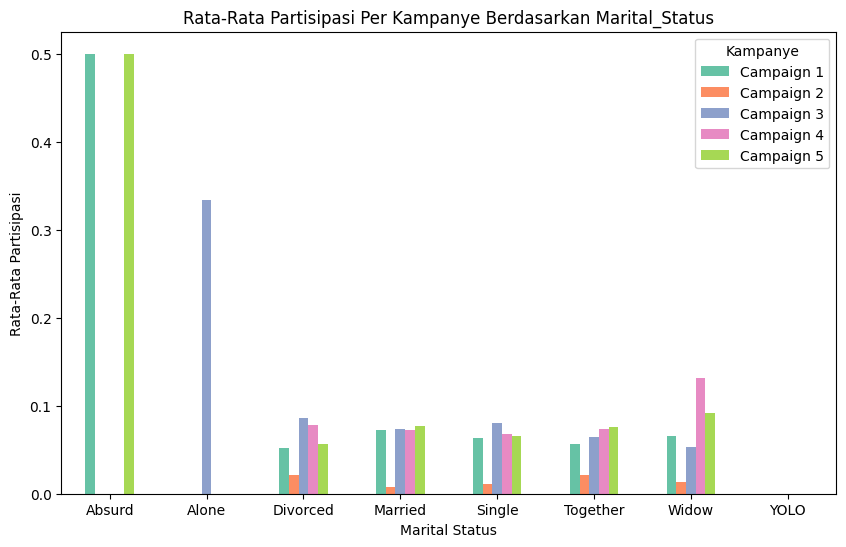

In [75]:
avg_campaign_participation_by_marital_status.plot(kind='bar', figsize=(10, 6), color=sns.color_palette('Set2'))
plt.title('Rata-Rata Partisipasi Per Kampanye Berdasarkan Marital_Status')
plt.xlabel('Marital Status')
plt.ylabel('Rata-Rata Partisipasi')
plt.xticks(rotation=0)
plt.legend(title='Kampanye', labels=['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5'])
plt.show()

Kesimpulan yang Bisa Diambil:
1. Kelompok dengan Total Partisipasi Terbanyak: Melalui analisis total partisipasi berdasarkan Marital_Status, kita bisa mengetahui status perkawinan mana yang lebih banyak berpartisipasi dalam kampanye.

2. Status Perkawinan dengan Rata-Rata Partisipasi Tertinggi: Dengan melihat rata-rata partisipasi, kita bisa menilai kelompok mana yang lebih sering berpartisipasi dalam kampanye.

3. Kampanye yang Perlu Ditargetkan pada Kampanye Berikutnya: Jika ada status perkawinan yang menunjukkan partisipasi rendah di beberapa kampanye, kita dapat menyesuaikan strategi kampanye untuk menargetkan kelompok tersebut.

#### **D. Economy Class**

In [76]:
# Menentukan kuartil berdasarkan deskripsi kolom 'Income'
q1 = data['Income'].quantile(0.25)
q3 = data['Income'].quantile(0.75)

# Membuat kolom baru untuk kelas ekonomi berdasarkan 'Income'
def classify_income(income):
    if income < q1:
        return 'Low'
    elif income < q3:
        return 'Medium'
    else:
        return 'High'

data['Income_Class'] = data['Income'].apply(classify_income)

# Menghitung total partisipasi berdasarkan kelas ekonomi
participation_by_income_class = data.groupby('Income_Class')['Total_Participation'].sum()
participation_by_income_class


Income_Class
High      558
Low       102
Medium    333
Name: Total_Participation, dtype: int64

In [120]:
income = data['Income_Class'].value_counts()
income

Income_Class
Medium    1105
High       554
Low        553
Name: count, dtype: int64

In [77]:
total_participation = data['Total_Participation'].sum()
participation_percentage = (participation_by_income_class / total_participation) * 100
participation_percentage

Income_Class
High      56.193353
Low       10.271903
Medium    33.534743
Name: Total_Participation, dtype: float64

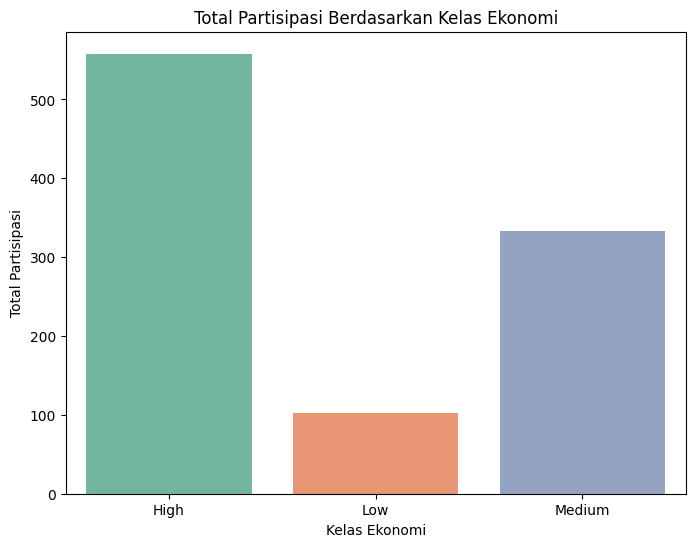

In [78]:
# Visualisasi total partisipasi berdasarkan kelas ekonomi
plt.figure(figsize=(8, 6))
sns.barplot(x=participation_by_income_class.index, y=participation_by_income_class.values, palette='Set2')
plt.title('Total Partisipasi Berdasarkan Kelas Ekonomi')
plt.xlabel('Kelas Ekonomi')
plt.ylabel('Total Partisipasi')
plt.show()

In [79]:
# Menghitung rata-rata partisipasi berdasarkan kelas ekonomi
avg_participation_by_income_class = data.groupby('Income_Class')['Total_Participation'].mean()
avg_participation_by_income_class

Income_Class
High      1.007220
Low       0.184448
Medium    0.301357
Name: Total_Participation, dtype: float64

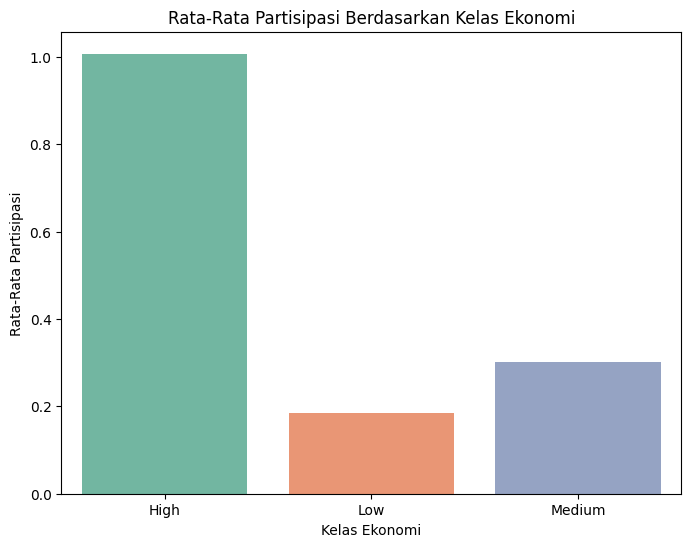

In [80]:
# Visualisasi rata-rata partisipasi berdasarkan kelas ekonomi
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_participation_by_income_class.index, y=avg_participation_by_income_class.values, palette='Set2')
plt.title('Rata-Rata Partisipasi Berdasarkan Kelas Ekonomi')
plt.xlabel('Kelas Ekonomi')
plt.ylabel('Rata-Rata Partisipasi')
plt.show()

In [81]:
# Kolom kampanye
campaign_columns = ['Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4', 'Campaign_5']

# Menghitung total partisipasi di setiap kampanye berdasarkan kelas ekonomi
campaign_participation_by_income_class = data.groupby('Income_Class')[campaign_columns].sum()
campaign_participation_by_income_class

,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5
Income_Class,,,,,
High,121,16,43,77,152
Low,0,0,43,1,0
Medium,21,14,77,86,9


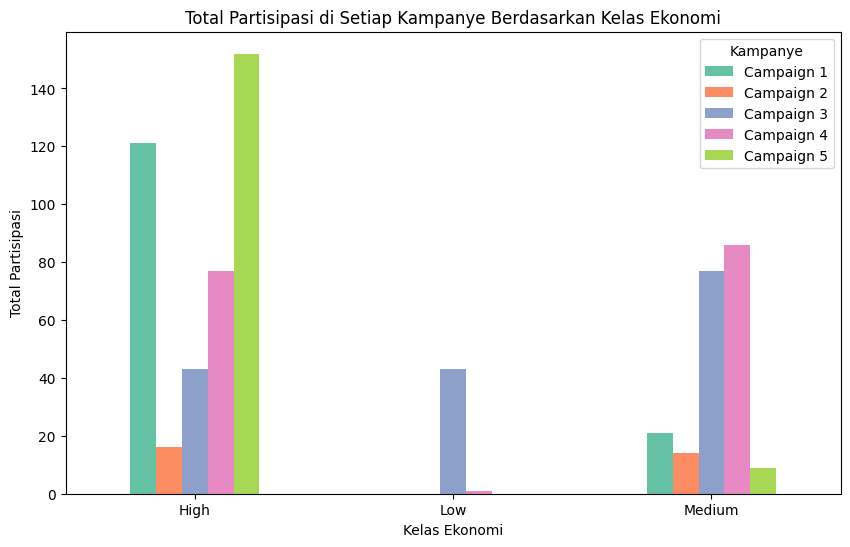

In [82]:
# Visualisasi total partisipasi per kampanye berdasarkan kelas ekonomi
campaign_participation_by_income_class.plot(kind='bar', figsize=(10, 6), color=sns.color_palette('Set2'))
plt.title('Total Partisipasi di Setiap Kampanye Berdasarkan Kelas Ekonomi')
plt.xlabel('Kelas Ekonomi')
plt.ylabel('Total Partisipasi')
plt.xticks(rotation=0)
plt.legend(title='Kampanye', labels=['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5'])
plt.show()

 Menilai Kampanye Terbaik untuk Ditargetkan pada Kampanye Berikutnya

In [83]:
# Menghitung rata-rata partisipasi per kampanye berdasarkan kelas ekonomi
avg_campaign_participation_by_income_class = data.groupby('Income_Class')[campaign_columns].mean()
avg_campaign_participation_by_income_class

,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5
Income_Class,,,,,
High,0.218412,0.028881,0.077617,0.138989,0.274368
Low,0.000000,0.000000,0.077758,0.001808,0.000000
Medium,0.019005,0.012670,0.069683,0.077828,0.008145


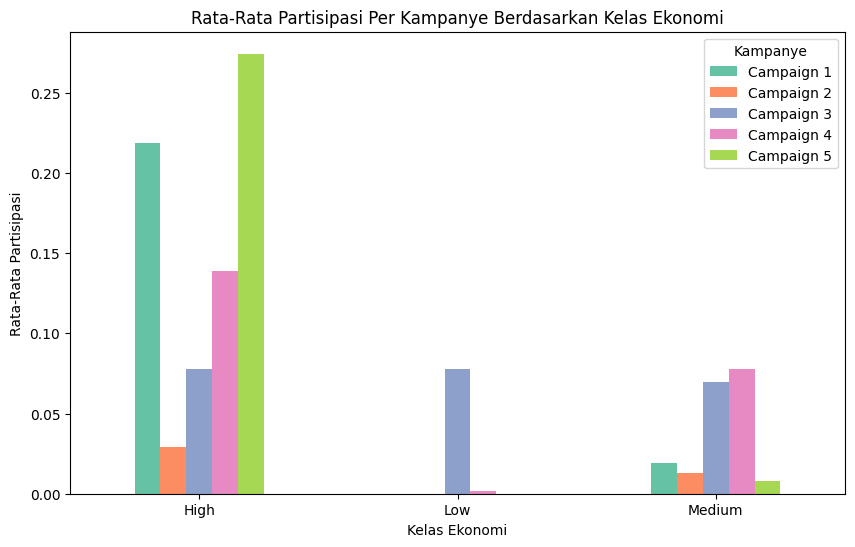

In [84]:
# Visualisasi rata-rata partisipasi per kampanye berdasarkan kelas ekonomi
avg_campaign_participation_by_income_class.plot(kind='bar', figsize=(10, 6), color=sns.color_palette('Set2'))
plt.title('Rata-Rata Partisipasi Per Kampanye Berdasarkan Kelas Ekonomi')
plt.xlabel('Kelas Ekonomi')
plt.ylabel('Rata-Rata Partisipasi')
plt.xticks(rotation=0)
plt.legend(title='Kampanye', labels=['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5'])
plt.show()

Kesimpulan yang Dapat Diambil:
- Kelas Ekonomi dengan Total Partisipasi Terbanyak: Melalui analisis total partisipasi berdasarkan kelas ekonomi, kita dapat mengetahui kelas ekonomi mana yang lebih banyak berpartisipasi dalam kampanye.

- Kelas Ekonomi dengan Rata-Rata Partisipasi Tertinggi: Dengan melihat rata-rata partisipasi, kita bisa mengetahui kelas ekonomi yang lebih aktif dalam berpartisipasi pada kampanye.

- Kampanye yang Perlu Ditargetkan pada Kampanye Berikutnya: Jika ada kelas ekonomi tertentu yang memiliki partisipasi rendah pada kampanye tertentu, kita bisa menyesuaikan strategi kampanye untuk menargetkan kelas ekonomi tersebut.

#### **E. FAMILY**

Kita akan mencoba mencari  family mana yang paling banyak berpartisipasi dalam kampanye untuk melihat permasalahan yang terjadi dan keluarga mana yang paling baik untuk ditargetkan pada kampanye berikutnya.

##### **Menghitung Total Partisipasi Berdasarkan Family**
menghitung total partisipasi berdasarkan kolom family untuk melihat kelompok mana yang memiliki tingkat partisipasi lebih tinggi.

In [85]:
participation_by_family_size = data.groupby('Is_Family')['Total_Participation'].sum().reset_index()
participation_by_family_size

,Is_Family,Total_Participation
0,Family,447
1,Not Family,546


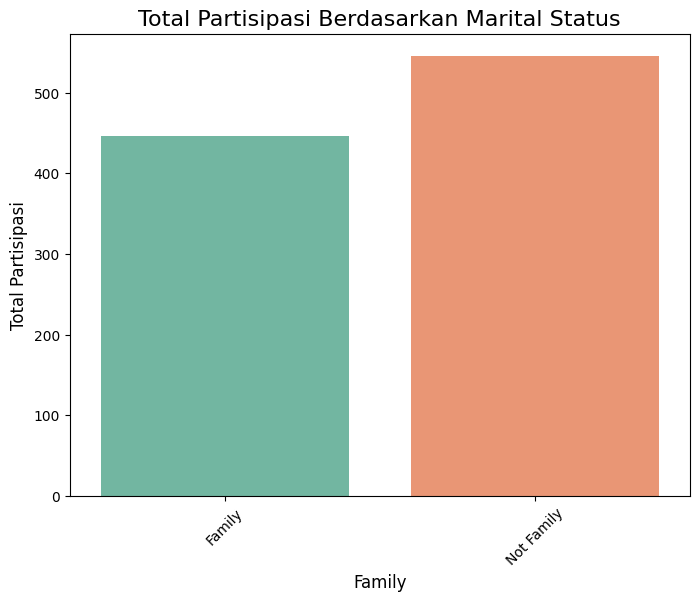

In [86]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Is_Family', y='Total_Participation', data=participation_by_family_size, palette='Set2')
plt.title('Total Partisipasi Berdasarkan Marital Status', fontsize=16)
plt.xlabel('Family', fontsize=12)
plt.ylabel('Total Partisipasi', fontsize=12)
plt.xticks(rotation=45)  # Memutar sumbu x jika nama status terlalu panjang
plt.show()

##### **Menghitung Rata-rata Partisipasi Berdasarkan Family**

In [87]:
avg_participation_by_family_size = data.groupby('Is_Family')['Total_Participation'].mean().reset_index()
avg_participation_by_family_size

,Is_Family,Total_Participation
0,Family,0.282911
1,Not Family,0.863924


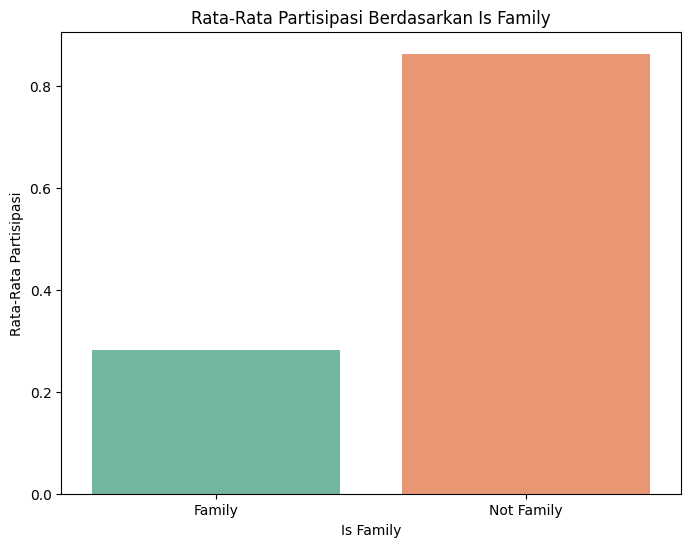

In [88]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Is_Family', y='Total_Participation', data=avg_participation_by_family_size, palette='Set2')
plt.title('Rata-Rata Partisipasi Berdasarkan Is Family')
plt.xlabel('Is Family')
plt.ylabel('Rata-Rata Partisipasi')
plt.show()

##### **Menghitung Total Partisipasi Berdasarkan Kampanye untuk Setiap Family**

In [89]:
campaign_columns = ['Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4', 'Campaign_5']

# Menghitung total partisipasi di setiap kampanye berdasarkan Marital_Status
campaign_participation_by_family_size = data.groupby('Is_Family')[campaign_columns].sum()
campaign_participation_by_family_size

,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5
Is_Family,,,,,
Family,33,12,115,97,25
Not Family,109,18,48,67,136


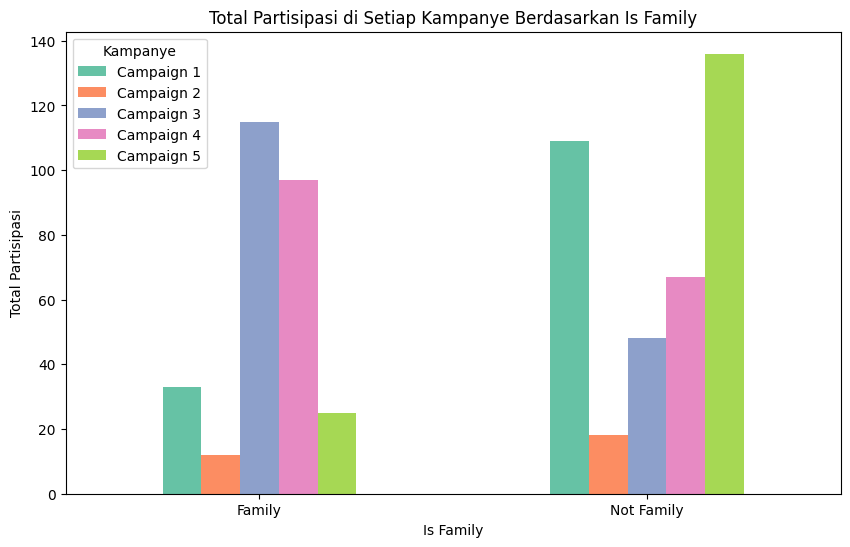

In [90]:
campaign_participation_by_family_size.plot(kind='bar', figsize=(10, 6), color=sns.color_palette('Set2'))
plt.title('Total Partisipasi di Setiap Kampanye Berdasarkan Is Family')
plt.xlabel('Is Family')
plt.ylabel('Total Partisipasi')
plt.xticks(rotation=0)
plt.legend(title='Kampanye', labels=['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5'])
plt.show()

##### **Menilai Kampanye Terbaik untuk Ditargetkan pada Kampanye Berikutnya**
Untuk menemukan kampanye yang lebih efektif untuk setiap status perkawinan, kita bisa melihat rata-rata partisipasi pada setiap kampanye. Jika ada kampanye yang memiliki partisipasi rendah pada status tertentu, kita bisa menargetkan kampanye tersebut kepada status perkawinan yang kurang berpartisipasi.

- Rata-Rata Partisipasi Per Kampanye Berdasarkan Is Family

In [91]:
avg_campaign_participation_by_is_family = data.groupby('Is_Family')[campaign_columns].mean()
avg_campaign_participation_by_is_family

,Campaign_1,Campaign_2,Campaign_3,Campaign_4,Campaign_5
Is_Family,,,,,
Family,0.020886,0.007595,0.072785,0.061392,0.015823
Not Family,0.172468,0.028481,0.075949,0.106013,0.215190


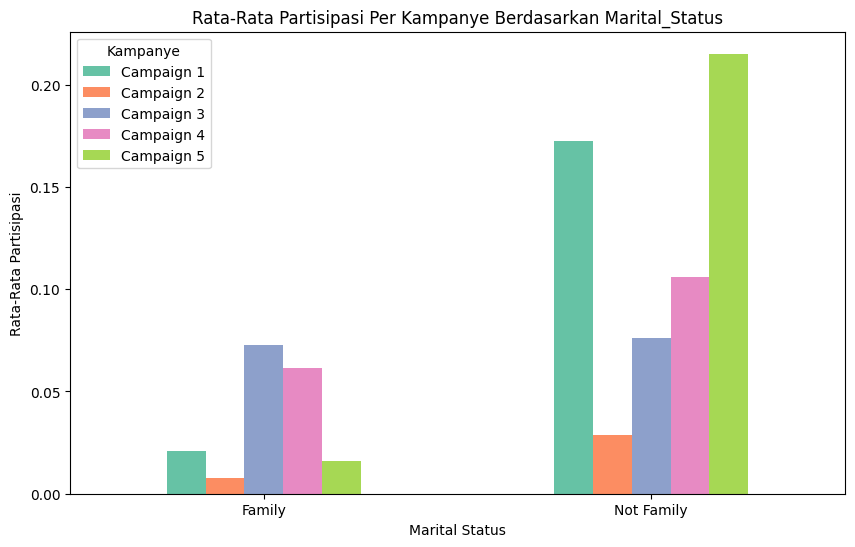

In [92]:
avg_campaign_participation_by_is_family.plot(kind='bar', figsize=(10, 6), color=sns.color_palette('Set2'))
plt.title('Rata-Rata Partisipasi Per Kampanye Berdasarkan Marital_Status')
plt.xlabel('Marital Status')
plt.ylabel('Rata-Rata Partisipasi')
plt.xticks(rotation=0)
plt.legend(title='Kampanye', labels=['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5'])
plt.show()

Kesimpulan yang Bisa Diambil:
1. Kelompok dengan Total Partisipasi Terbanyak: Melalui analisis total partisipasi berdasarkan Marital_Status, kita bisa mengetahui status perkawinan mana yang lebih banyak berpartisipasi dalam kampanye.

2. Status Perkawinan dengan Rata-Rata Partisipasi Tertinggi: Dengan melihat rata-rata partisipasi, kita bisa menilai kelompok mana yang lebih sering berpartisipasi dalam kampanye.

3. Kampanye yang Perlu Ditargetkan pada Kampanye Berikutnya: Jika ada status perkawinan yang menunjukkan partisipasi rendah di beberapa kampanye, kita dapat menyesuaikan strategi kampanye untuk menargetkan kelompok tersebut.

### **3. DISCOUNT**

([<matplotlib.patches.Wedge at 0x21523f689e0>,
 [Text(-1.0978528901936861, 0.06869520720814724, 'Y'),
  Text(1.097852896199208, -0.06869511123079527, 'N')],
 [Text(-0.598828849196556, 0.03747011302262576, '98.0%'),
  Text(0.5988288524722952, -0.03747006067134288, '2.0%')])

,Discount,countDisc
0,Y,2168
1,N,44


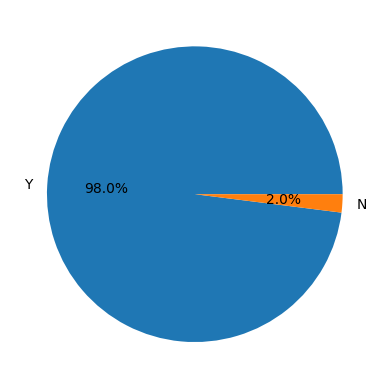

In [93]:
dictHaveDisc = {'Discount' : ['Y','N'],
                'countDisc': [data[data['Discount'] != 0]['ID'].count(),data[data['Discount'] == 0]['ID'].count()]}

dfHaveDisc = pd.DataFrame(dictHaveDisc)
display(plt.pie(dfHaveDisc['countDisc'],
                labels=dfHaveDisc['Discount'],
                autopct='%1.1f%%'),
        dfHaveDisc)

**Dari plot diatas diketahui bahwa banyak yang belanja menggunakan discount**

In [94]:
discRate = (data['Discount'].sum() / data['Total_Place'].sum()) * 100
f'{round(discRate)}%'

'18%'

Namun, berdasarkan rasio pembelian yang dilakukan, pembelian dengan diskon terbilang sangat kecil. Hanya 18%, artinya hanya 1 pembelian yang dilakukan dengan diskon dari 5 pembelian. Namun, hal ini bisa jadi karena barang-barang yang didiskon tersebut bukanlah barang yang dibutuhkan oleh masyarakat. Jadi, tidak banyak pembelian yang dilakukan dengan diskon. Kita TIDAK BISA menyimpulkan produk mana yang terbaik berdasarkan data ini, karena data tersebut hanya menunjukkan jumlah yang dibelanjakan untuk produk (USD). Namun, kita tetap dapat memilih produk yang didiskon berdasarkan kebutuhan Demografi untuk meningkatkan partisipasi dalam kampanye. Seperti yang telah kita simpulkan sebelumnya, diskon juga dapat dijadikan sebagai alat untuk menyasar audiens.

#### **AGE GROUP**

**TOP AGE GROUP HAS PARTICIPATED IN DISCOUNT**

In [95]:
cat_age_group = data['Age_Group'].value_counts()
top_age_group = ['51 - 60', '41 - 50', '61 - 70']

,Age Group,participated,not participated
0,51 - 60,98.751950,1.248050
1,41 - 50,97.255575,2.744425
2,61 - 70,98.286938,1.713062


<Axes: xlabel='Age Group'>

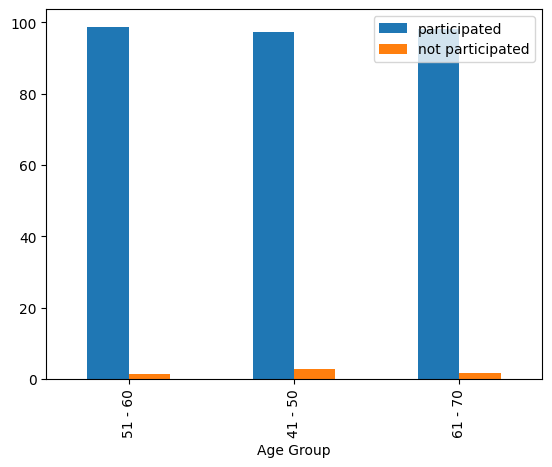

In [96]:
disc_age_group = ((data[data['Discount'] != 0]['Age_Group'].value_counts() / cat_age_group) * 100).loc[top_age_group].to_frame().reset_index()
disc_age_group = disc_age_group.merge(((data[data['Discount'] == 0]['Age_Group'].value_counts() / cat_age_group) * 100).loc[top_age_group].to_frame().reset_index(),
                        'inner', 'Age_Group').rename({'Age_Group' : 'Age Group',
                                         'count_x' : 'participated',
                                         'count_y' : 'not participated'},
                                         axis=1)
display(disc_age_group,
        disc_age_group.set_index('Age Group').plot.bar())

**DISCOUNT PURCHASE RATE PER AGE GROUP**

,Age_Group,buyRate,notBuyRate
0,51 - 60,20.933486,79.066514
1,41 - 50,19.592686,80.407314
2,61 - 70,18.077453,81.922547


<Axes: xlabel='Age_Group'>

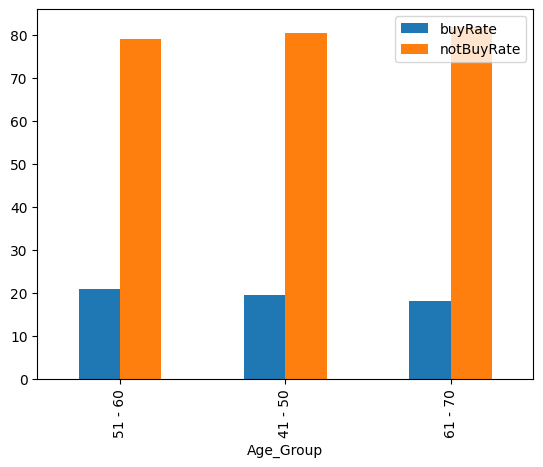

In [97]:
disc_rate_age_group = ((data.groupby('Age_Group')['Discount'].sum() / data.groupby('Age_Group')['Total_Place'].sum()) * 100).loc[top_age_group].to_frame().reset_index()
disc_rate_age_group = disc_rate_age_group.merge((100 - ((data.groupby('Age_Group')['Discount'].sum() / data.groupby('Age_Group')['Total_Place'].sum()) * 100)).loc[top_age_group].to_frame().reset_index(),
                                'inner',
                                'Age_Group').rename({'0_x' : 'buyRate',
                                                      '0_y' : 'notBuyRate'},
                                                      axis=1)

display(disc_rate_age_group,
        disc_rate_age_group.set_index('Age_Group').plot.bar())

Tapi, rate per purchase masih cukup kecil.
Produk tersebut tampaknya tidak sesuai dengan kebutuhan kategori generasi.
Secara keseluruhan, 1 pembelian dilakukan dengan diskon dari 5 pembelian.
Kecenderungan kecil terjadi pada umur 51 - 60 yang membeli lebih banyak saat diskon.

#### **EDUCATION**

**TOP EDUCATION HAS PARTICIPATED IN DISCOUNT**

,Education,participated,not participated
0,PhD,97.291667,2.708333
1,Graduation,98.026906,1.973094
2,Master,98.082192,1.917808


<Axes: xlabel='Education'>

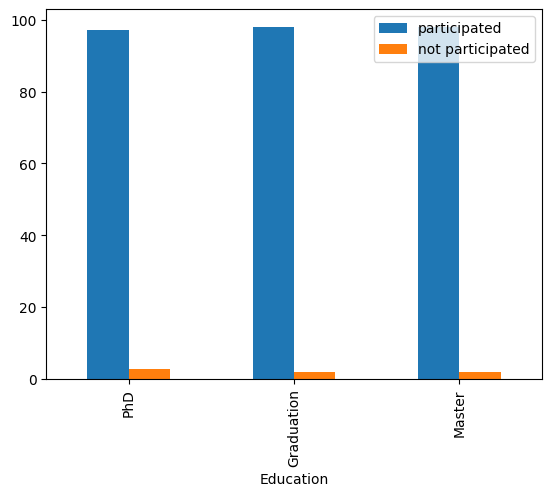

In [98]:
cat_education = data['Education'].value_counts()
top_education = ['PhD','Graduation','Master']

discEdu = ((data[data['Discount'] != 0]['Education'].value_counts() / cat_education) * 100).loc[top_education].to_frame().reset_index()
discEdu = discEdu.merge(((data[data['Discount'] == 0]['Education'].value_counts() / cat_education) * 100).loc[top_education].to_frame().reset_index(),
                        'inner',
                        'Education').rename({
                                         'count_x' : 'participated',
                                         'count_y' : 'not participated'},
                                         axis=1)
display(discEdu,
        discEdu.set_index('Education').plot.bar())

**DISCOUNT PURCHASE RATE PER EDUCATION**

,Education,buyRate,notBuyRate
0,PhD,17.510809,82.489191
1,Graduation,18.190806,81.809194
2,Master,19.446276,80.553724


<Axes: xlabel='Education'>

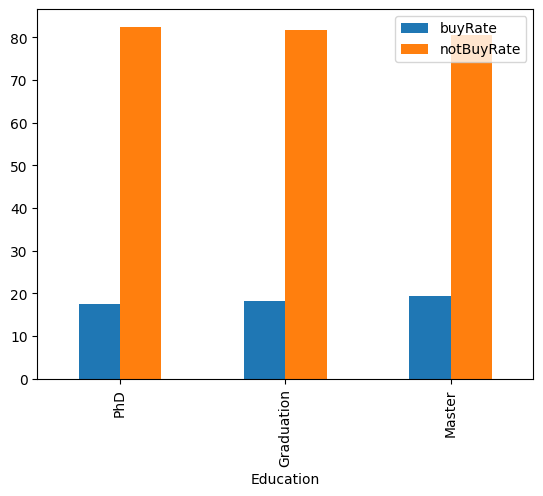

In [99]:
discRateEdu = ((data.groupby('Education')['Discount'].sum() / data.groupby('Education')['Total_Place'].sum()) * 100).loc[top_education].to_frame().reset_index()
discRateEdu = discRateEdu.merge((100 - ((data.groupby('Education')['Discount'].sum() / data.groupby('Education')['Total_Place'].sum()) * 100)).loc[top_education].to_frame().reset_index(),
                                'inner',
                                'Education').rename({'0_x' : 'buyRate',
                                                      '0_y' : 'notBuyRate'},
                                                      axis=1)
display(discRateEdu,
        discRateEdu.set_index('Education').plot.bar())

Tapi, rate per purchase masih cukup kecil.
Produk tersebut tampaknya tidak sesuai dengan kebutuhan kategori education.
Secara keseluruhan, 1 pembelian dilakukan dengan diskon dari 5 pembelian.
Kecenderungan kecil terjadi pada Master yang membeli lebih banyak saat diskon.

#### **MARITAL**

**TOP MARITAL HAS PARTICIPATED IN DISCOUNT**

,Marital_Status,participated,not participated
0,Married,98.833139,1.166861
1,Single,97.021277,2.978723
2,Together,97.898424,2.101576


<Axes: xlabel='Marital_Status'>

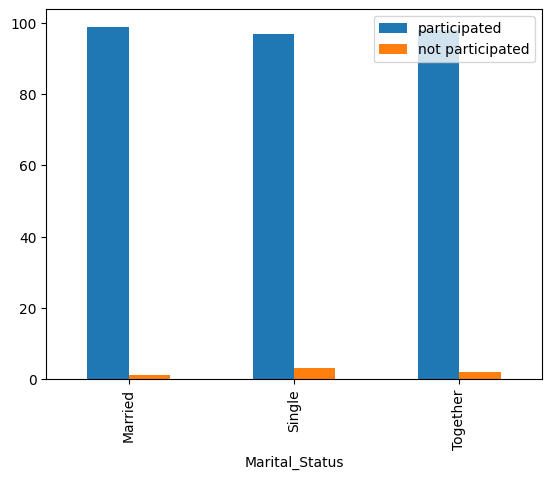

In [100]:
cat_marital = data['Marital_Status'].value_counts()
top_marital = ['Married','Single','Together']

discmarital = ((data[data['Discount'] != 0]['Marital_Status'].value_counts() / cat_marital) * 100).loc[top_marital].to_frame().reset_index()
discmarital = discmarital.merge(((data[data['Discount'] == 0]['Marital_Status'].value_counts() / cat_marital) * 100).loc[top_marital].to_frame().reset_index(),
                        'inner',
                        'Marital_Status').rename({
                                         'count_x' : 'participated',
                                         'count_y' : 'not participated'},
                                         axis=1)
display(discmarital,
        discmarital.set_index('Marital_Status').plot.bar())

**DISCOUNT PURCHASE RATE PER MARITAL**

,Marital_Status,buyRate,notBuyRate
0,Married,18.963596,81.036404
1,Single,17.519651,82.480349
2,Together,18.553679,81.446321


<Axes: xlabel='Marital_Status'>

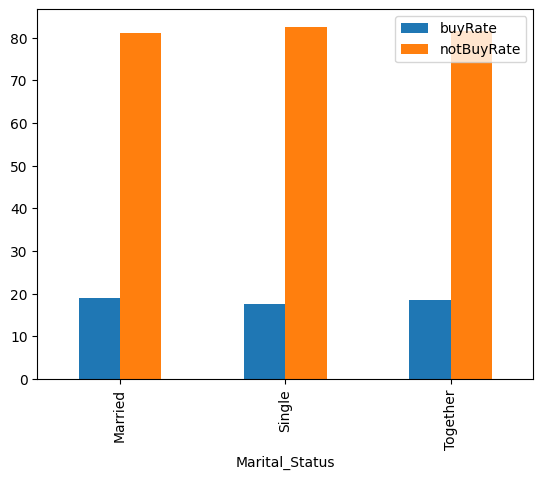

In [101]:
disc_rate_marital = ((data.groupby('Marital_Status')['Discount'].sum() / data.groupby('Marital_Status')['Total_Place'].sum()) * 100).loc[top_marital].to_frame().reset_index()
disc_rate_marital = disc_rate_marital.merge((100 - ((data.groupby('Marital_Status')['Discount'].sum() / data.groupby('Marital_Status')['Total_Place'].sum()) * 100)).loc[top_marital].to_frame().reset_index(),
                                'inner',
                                'Marital_Status').rename({'0_x' : 'buyRate',
                                                      '0_y' : 'notBuyRate'},
                                                      axis=1)
display(disc_rate_marital,
        disc_rate_marital.set_index('Marital_Status').plot.bar())

Tapi, rate per purchase masih cukup kecil.

Produk tersebut tampaknya tidak sesuai dengan kebutuhan kategori marital status.

Secara keseluruhan, 1 pembelian dilakukan dengan diskon dari 5 pembelian.

Kecenderungan kecil terjadi pada Married dan Together yang membeli lebih banyak saat diskon.

#### **ECONOMY CLASS**

**TOP ECO CLASS HAS PARTICIPATED IN DISCOUNT**

,Income_Class,participated,not participated
0,High,93.321300,6.678700
1,Medium,100.000000,NaN
2,Low,98.734177,1.265823


<Axes: xlabel='Income_Class'>

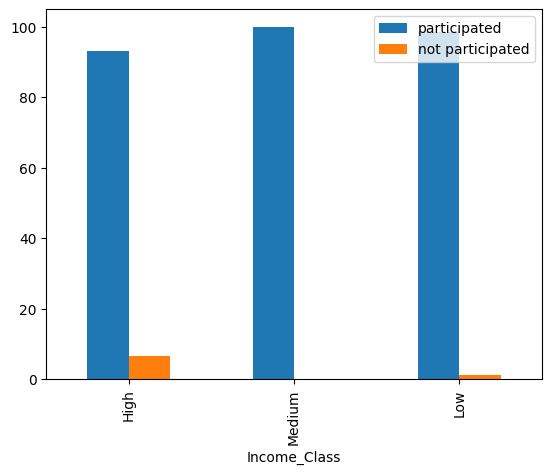

In [102]:
cat_income = data['Income_Class'].value_counts()
top_income = ['High','Medium', 'Low']

discincome = ((data[data['Discount'] != 0]['Income_Class'].value_counts() / cat_income) * 100).loc[top_income].to_frame().reset_index()
discincome = discincome.merge(((data[data['Discount'] == 0]['Income_Class'].value_counts() / cat_income) * 100).loc[top_income].to_frame().reset_index(),
                        'inner',
                        'Income_Class').rename({
                                         'count_x' : 'participated',
                                         'count_y' : 'not participated'},
                                         axis=1)
display(discincome,
        discincome.set_index('Income_Class').plot.bar())

**DISCOUNT PURCHASE RATE PER ECO CLASS**

,Income_Class,buyRate,notBuyRate
0,High,7.270527,92.729473
1,Medium,22.949302,77.050698
2,Low,37.782205,62.217795


<Axes: xlabel='Income_Class'>

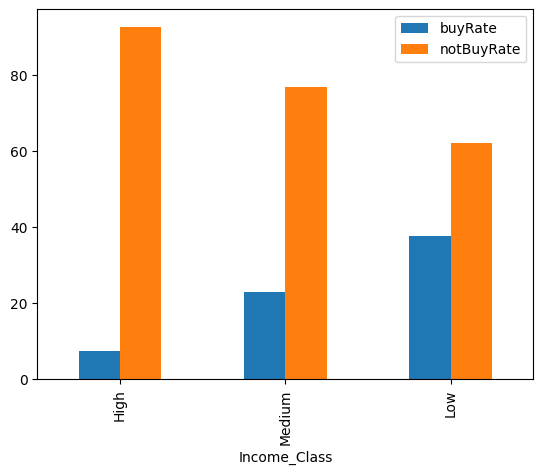

In [103]:
disc_rate_income_class = ((data.groupby('Income_Class')['Discount'].sum() / data.groupby('Income_Class')['Total_Place'].sum()) * 100).loc[top_income].to_frame().reset_index()
disc_rate_income_class = disc_rate_income_class.merge((100 - ((data.groupby('Income_Class')['Discount'].sum() / data.groupby('Income_Class')['Total_Place'].sum()) * 100)).loc[top_income].to_frame().reset_index(),
                                'inner',
                                'Income_Class').rename({'0_x' : 'buyRate',
                                                      '0_y' : 'notBuyRate'},
                                                      axis=1)
display(disc_rate_income_class,
        disc_rate_income_class.set_index('Income_Class').plot.bar())

**rate per purchase sedikit lebih baik**

Produk tampaknya menjawab kebutuhan satu kategori kelas ekonomi.

low class tampaknya lebih banyak berpartisipasi dalam diskon.

,Is_Family,participated,not participated
0,Family,99.556962,0.443038
1,Not Family,94.145570,5.854430


<Axes: xlabel='Is_Family'>

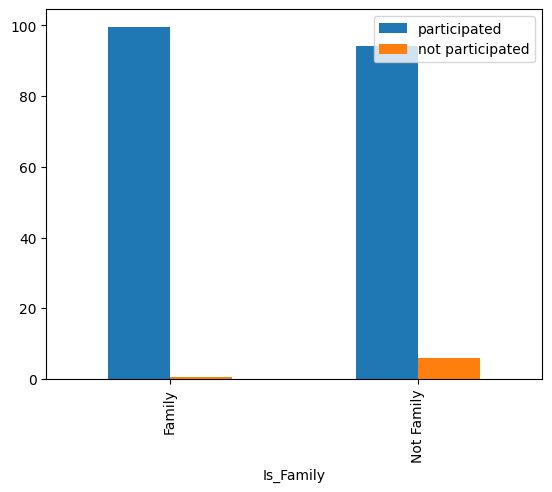

In [104]:
cat_family = data['Is_Family'].value_counts()

discFam = ((data[data['Discount'] != 0]['Is_Family'].value_counts() / cat_family) * 100).to_frame().reset_index()
discFam = discFam.merge(((data[data['Discount'] == 0]['Is_Family'].value_counts() / cat_family) * 100).to_frame().reset_index(),
                        'inner',
                        'Is_Family').rename({
                                         'count_x' : 'participated',
                                         'count_y' : 'not participated'},
                                         axis=1)
display(discFam,
        discFam.set_index('Is_Family').plot.bar())

**DISCOUNT PURCHASE RATE PER FAMILY**

,Is_Family,buyRate,notBuyRate
0,Family,25.395001,74.604999
1,Not Family,6.946984,93.053016


<Axes: xlabel='Is_Family'>

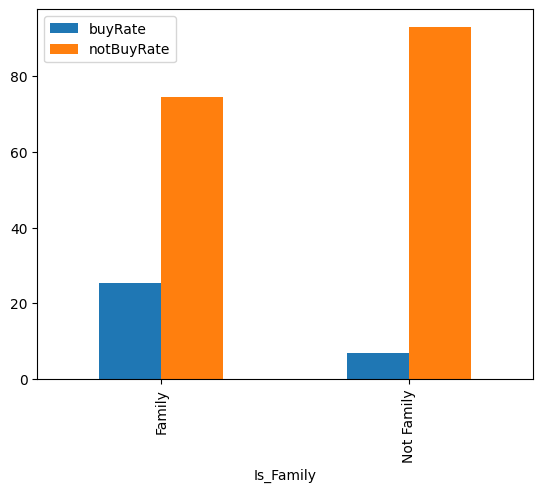

In [105]:
discRateFam = ((data.groupby('Is_Family')['Discount'].sum() / data.groupby('Is_Family')['Total_Place'].sum()) * 100).to_frame().reset_index()
discRateFam = discRateFam.merge((100 - ((data.groupby('Is_Family')['Discount'].sum() / data.groupby('Is_Family')['Total_Place'].sum()) * 100)).to_frame().reset_index(),
                                'inner',
                                'Is_Family').rename({'0_x' : 'buyRate',
                                                      '0_y' : 'notBuyRate'},
                                                      axis=1)
display(discRateFam,
        discRateFam.set_index('Is_Family').plot.bar())

**Rate per purchase sedikit lebih baik**

Produk tampaknya menjawab kebutuhan satu kategori keluarga.

Family tampaknya lebih banyak berpartisipasi dalam diskon.

### **Discount Conclusion**

Jadi, kita dapat menggunakan Diskon sebagai alat untuk menarik lebih banyak peserta, tetapi kita harus menargetkan barang-barang diskon berdasarkan kebutuhan setiap kategori dalam demografi.
Jika kita melihat kampanye-kampanye sebelumnya, barang-barang diskon tampaknya menarik Kelas low dan Keluarga.
Seperti yang disebutkan sebelumnya, akan lebih baik jika kita menargetkan populasi yang lebih besar.

### **4. CHANNEL OF PURCHASE**

In [106]:
data.columns

Index(['ID', 'Year_Birth', 'Age', 'Age_Group', 'Education', 'Living_With',
       'Marital_Status', 'Kidhome', 'Teenhome', 'Children', 'Is_Family',
       'Income', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweet', 'Gold', 'Total_Spent', 'Discount', 'From_Website',
       'From_Catalog', 'From_Store', 'Total_Place', 'Web_Visit/Month',
       'Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4', 'Campaign_5',
       'Last_Campaign', 'Total_Participation', 'Complain', 'Income_Binned',
       'Total_Online_Purchases', 'Total_Store_Purchases', 'Recency_Binned',
       'Income_Class'],
      dtype='object')

From_Website    2164
From_Catalog    1637
From_Store      2198
dtype: int64

([<matplotlib.patches.Wedge at 0x21527851850>,
 [Text(0.46608351137035015, 0.9963765153939975, 'From_Website'),
  Text(-1.0998256397868589, 0.01958474067805519, 'From_Catalog'),
  Text(0.4482698048111012, -1.0045168899001238, 'From_Store')],
 [Text(0.2542273698383728, 0.5434780993058168, '36.1%'),
  Text(-0.5999048944291957, 0.010682585824393739, '27.3%'),
  Text(0.24451080262423697, -0.5479183035818856, '36.6%')])

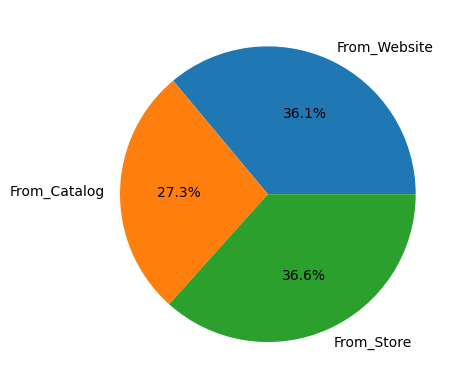

In [107]:
particChannel = pd.Series([data[data['From_Website'] != 0]['ID'].count(),
                            data[data['From_Catalog'] != 0]['ID'].count(),
                            data[data['From_Store'] != 0]['ID'].count()],
                        ['From_Website','From_Catalog','From_Store'])
display(particChannel,
        plt.pie(particChannel,
                labels = particChannel.index,
                autopct = '%1.1f%%'))

**Store and Web is the most used channel of purchase**

From_Website     9043
From_Catalog     5911
From_Store      12844
dtype: int64

([<matplotlib.patches.Wedge at 0x21526ffd760>,
 [Text(0.5738311637236155, 0.9384656602878985, 'From_Website'),
  Text(-1.0000593614029931, 0.4581280101349818, 'From_Catalog'),
  Text(0.13084383007978612, -1.0921904101987219, 'From_Store')],
 [Text(0.31299881657651757, 0.5118903601570355, '32.5%'),
  Text(-0.5454869244016325, 0.24988800552817186, '21.3%'),
  Text(0.07136936186170151, -0.5957402237447573, '46.2%')])

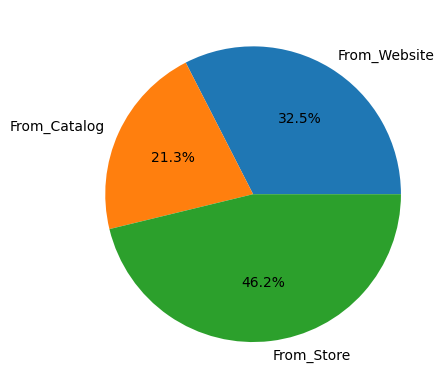

In [108]:
purchChannelAll = data[['From_Website', 'From_Catalog', 'From_Store']].sum()
display(purchChannelAll,
        plt.pie(purchChannelAll,
                labels = purchChannelAll.index,
                autopct = '%1.1f%%'))

**Store generates most purchase out of all channels**

,Age_Group,From_Website,From_Catalog,From_Store
0,51 - 60,4.185647,2.452418,5.628705
1,41 - 50,3.823328,2.289880,5.425386
2,61 - 70,4.464668,3.167024,6.357602


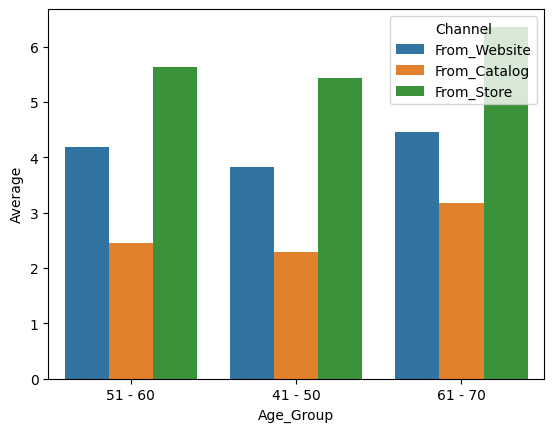

In [109]:
purchChannelGen = data.groupby('Age_Group')[['From_Website', 'From_Catalog', 'From_Store']].mean().loc[top_age_group].reset_index()
sns.barplot(data = purchChannelGen.melt(id_vars = 'Age_Group',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'Age_Group',
            y = 'Average',
            hue = 'Channel')
purchChannelGen

,Education,From_Website,From_Catalog,From_Store
0,PhD,4.433333,2.981250,6.077083
1,Graduation,4.116592,2.739910,5.843946
2,Master,4.035616,2.545205,5.887671


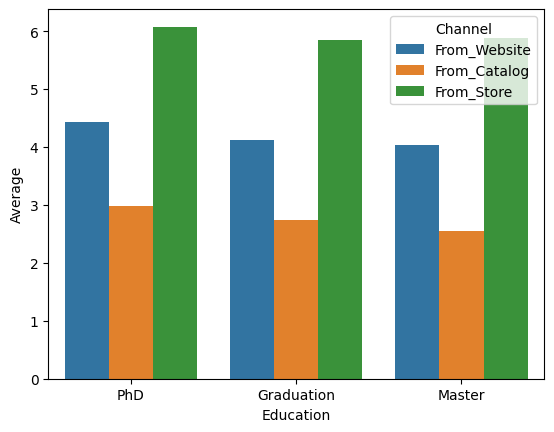

In [110]:
purchChannelEdu = data.groupby('Education')[['From_Website', 'From_Catalog', 'From_Store']].mean().loc[top_education].reset_index()
sns.barplot(data = purchChannelEdu.melt(id_vars = 'Education',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'Education',
            y = 'Average',
            hue = 'Channel')
purchChannelEdu

,Marital_Status,From_Website,From_Catalog,From_Store
0,Married,4.085181,2.630105,5.849475
1,Single,3.857447,2.638298,5.685106
2,Together,4.105079,2.676007,5.763573


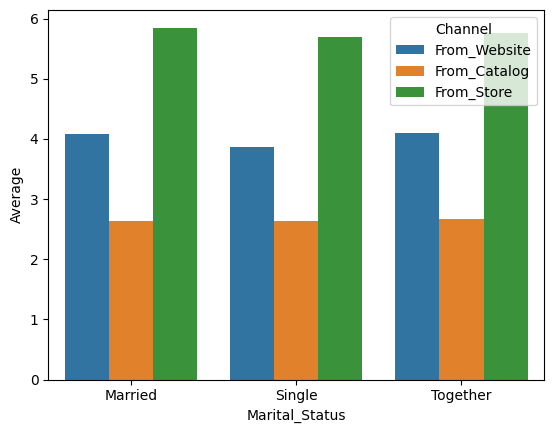

In [111]:
purchChannelMarital = data.groupby('Marital_Status')[['From_Website', 'From_Catalog', 'From_Store']].mean().loc[top_marital].reset_index()
sns.barplot(data = purchChannelMarital.melt(id_vars = 'Marital_Status',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'Marital_Status',
            y = 'Average',
            hue = 'Channel')
purchChannelMarital

,Income_Class,From_Website,From_Catalog,From_Store
0,High,5.306859,5.711191,8.371841
1,Medium,4.516742,2.247964,5.944796
2,Low,2.010850,0.475588,2.960217


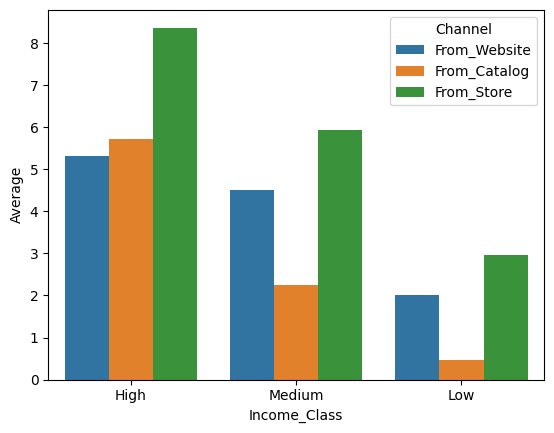

In [112]:
purchChannelEco = data.groupby('Income_Class')[['From_Website', 'From_Catalog', 'From_Store']].mean().loc[top_income].reset_index()
sns.barplot(data = purchChannelEco.melt(id_vars = 'Income_Class',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'Income_Class',
            y = 'Average',
            hue = 'Channel')
purchChannelEco

,Is_Family,From_Website,From_Catalog,From_Store
0,Family,3.960759,1.834177,5.220886
1,Not Family,4.406646,4.767405,7.270570


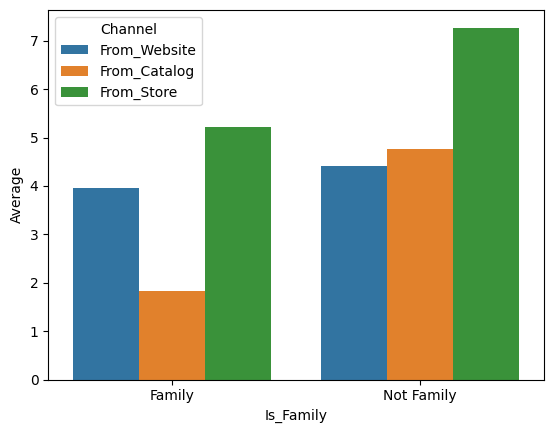

In [113]:
purchChannelFam = data.groupby('Is_Family')[['From_Website', 'From_Catalog', 'From_Store']].mean().reset_index()
sns.barplot(data = purchChannelFam.melt(id_vars = 'Is_Family',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'Is_Family',
            y = 'Average',
            hue = 'Channel')
purchChannelFam

**Terlepas dari semua kelas demografi, semua orang memilih Toko sebagai saluran pembelian.**
Kemudian diikuti oleh Web sebagai pilihan kedua saluran pembelian.

Artinya, kita harus lebih banyak meningkatkan kampanye di toko untuk menarik lebih banyak peserta.
Kemudian, jika kita memiliki anggaran yang cukup, kita juga dapat mempertimbangkan web sebagai saluran sekunder untuk meningkatkan kampanye kita.

Desain besarnya harus tetap sesuai dengan kelompok demografi tertinggi seperti yang selalu disebutkan sebelumnya.

## **5. OVERALL CONCLUSION AND RECOMENDATION**

**Kesimpulan**

Kesimpulan

Populasi terbanyak dari kategori pelanggan:

1. Age Group : 51 - 60 (29%)
2. Education : Graduation (50%)
3. Marital Status : Married (38%)
4. Family : Family (71%)
5. Purchase : Wines (50%)
6. Channel : Store (46%)
7. Campaign : Last Campaign (33%)
8. Complain : No (99%)

Kategori pelanggan yang paling banyak berpartisipasi campaign :

1. Participation : Do Not Accepted
2. Age Group : 51 - 60 (270)
3. Education : Graduation (491)
4. Marital Status : Married (358)
5.  Economy Class : High (558)
6. Family : Not Family (564)
7. Channel : Store

kategori-kategori ini adalah yang paling berpotensi untuk ditargetkan jika kita menginginkan customer yang lebih besar.
Namun, kita harus memprioritaskan tipe demografi mana yang harus lebih kita tuju dalam kampanye dan prioritas tersebut juga diperingkat dalam daftar di atas.

Diskon juga dapat digunakan untuk menarik atau menargetkan lebih banyak peserta karena hampir semua orang pernah membeli dengan diskon.

Saluran pembelian, terlepas dari jenis demografi, semuanya memilih Toko sebagai saluran pembelian utama mereka.

**Recomendation**

Berdasarkan hasil analisis tersebut, beberapa hal yang dapat direkomendasikan adalah:

- Mempertahankan kategori pelanggan yang telah berpartisipasi pada campaign sebelumnya. 
- Mempertahankan penjualan produk yang sudah memiliki jumlah pembelian yang baik seperti Wines dan Meat, dengan campaign yang lebih menarik, promosi diskon, program beli dua dapat satu.
- Perlu Mengevaluasi produk yang jumlah pembeliannya masih rendah seperti emas, ikan, permen dan buah-buahan perlu dievaluasi dan ditingkatkan seperti kualitas barang yang kurang baik atau produk tersebut bukan merupakan komoditas dalam negeri (perlu impor dari negara lain), atau karena promosi atau pemasaran yang kurang efektif.
- Mengetahui target pasar: Identifikasi dengan jelas siapa target pasar Supermarket. Gunakan database penjualan untuk memahami pola pembelian dan preferensi pelanggan. Dengan pemahaman ini, dapat mengoptimalkan strategi penjualan dan mengidentifikasi peluang baru.
- Melakukan lebih banyak promosi untuk web dan catalog.


In [115]:
data.to_excel('Supermarket Campaign Project.xlsx', index=False)